# Homework 5: Ups and Downs of Discretization

Name: Jonathan Manzano

Department, Institution: Computer Science, San Jose State University

Course: CS 185C—Advance Practical Computing Topics (Oceanography)

Professor: Dr. Mike Wood

Date: 2024-11-22

## Overview:

In this homework, you will consider a classic example of an ordinary differential equation—the harmonic oscillator. In particular, you'll first consider the analytical solution and then compare with a numerical solution by discretizing the equation.


## Import modules

Begin by importing modules to conduct calculations and make plots.

In [1]:
# import modules here
import numpy as np
import matplotlib.pyplot as plt

## Problem Description

The set-up for this equation is relatively simple: consider the following diagram which shows a mass on a string set up on a horizontal track:

![Spring Diagram](images/spring_diagram.png)

In this scenario, the weight has mass $m$ and the string has a certain "stiffness." Further, we may consider friction on the track as the mass moves back and forth.

### Physical Setting

There are three laws that describe the setting:

#### Hooke's Law

Hooke's law dictates that a spring experiences a restoring force which is proportional to its displacement. The constant of proportionality ($k$) reflects the stiffness of the spring. The force is written as:

$$
F_{Hooke} = -kx
$$

#### Friction

An object in motion along a surface experiences a force proportional to its speed. The constant of proportionality ($\mu$) reflects the "bumpiness" of the surface. The force is written as

$$
F_{friction} = -\mu x'
$$

#### Newton's Second Law

Newton's second law indicates that the forces on an object are equal to its mass times its acceleration, i.e.

$$
F = ma = mx''
$$

#### Differential Equation

By equating the total force $F$ to that of friction and Hooke's law, we can formulate the differential equation for the solution as:

$$
x''(t) + \frac{\mu}{m}x'(t) + \frac{k}{m}x(t) = 0
$$

#### Initial Conditions

If we'd like to predict the full trajectory of our mass in the spring through time, we also need to have the initial conditions—where it starts and how fast it is moving. For this example, let's consider that we stretch the spring a give distance $x_0$ from is starting position and let it go from there. In other words:

$$
\begin{align}
x(0) &= x_0\\
x'(0) &= 0
\end{align}
$$

Where $x_0$ is the initial displacement of the weight and $0$ represents the initial velocity of the weight (at rest).

#### Note:

For this homework, assume that $\mu = 0$ so that there is no friction and the equation simplifies to

$$
x''(t) + \frac{k}{m}x(t) = 0
$$

Complete the following parts with this assumption.

#### Optional Challenge

If you'd like a challenge, then you can instead solve for $\mu \neq 0$ in the parts below.

## Part 1: An Analytical Solution

In this example, the analytical solutions for the trajectory for the mass over time are given by:

### Option with $\mu = 0$:

$$
x(t) = x_0 \cos\left(\sqrt{\frac{k}{m}} t\right)
$$

### Challenge Option (with $\mu \neq 0$):

$$
x(t) = x_0 \exp\left( -\frac{\mu}{2m}t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2} }t \right)
$$

For whichever option you are pursuing in this homework, show that

1. The solution indeed satisfies the differential equation
2. The solution satisfies the initial condition $x(0)= x_0$

If you are familiar with LaTex, you can enter your solutions here. Otherwise, you can write your solutions on paper, scan them, and turn them in on Canvas.

#### Solution:

Get the first derivative

$$
\begin{align}
x(t) &= x_0 \exp\left(-\frac{\mu}{2m} \, t\right) \cos\left(\sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t\right) \\
\frac{d}{dt} [x(t)] &= \frac{d}{dt} \left[ x_0 \exp\left(-\frac{\mu}{2m} \, t \right) \cos\left(\sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t\right) \right]
\end{align}
$$

Define terms

$$
\begin{align}
\text{Let } \alpha &= -\frac{\mu}{2m} \\
\text{Let } \omega &= \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}}
\end{align}
$$

Substitute

$$
\begin{align}
\frac{d}{dt}\left[ x(t) \right] &= \frac{d}{dt}\left[ x_0 \exp(\alpha t) \cos(\omega t) \right] \\
&= x_0 \frac{d}{dt} \left[ \exp(\alpha t) \cos(\omega t) \right]
\end{align}
$$

Apply Product Rule

$$
\begin{align}
\frac{d}{dt}\left[ x(t) \right] &= x_0 \frac{d}{dt} \left[\exp(\alpha t) \cos(\omega t)\right] \\
&= x_0 \left\{ \frac{d}{dt} \left[\exp(\alpha t)\right] \cos(\omega t) + \exp(\alpha t) \frac{d}{dt} \left[\cos(\omega t)\right] \right\} \\
&= x_0 \left\{ [\exp(\alpha t) \cdot \alpha] \cdot \cos(\omega t) + \exp(\alpha t) \cdot [-\sin(\omega t) \cdot \omega] \right\} \\
&= \alpha x_0 \exp(\alpha t) \cos(\omega t) - \omega x_0 \exp(\alpha t) \sin(\omega t)
\end{align}
$$

Get the second derivative

$$
\begin{align}
\frac{d^2}{dt^2} [x(t)] &= \frac{d}{dt} \left[ \alpha x_0 \exp(\alpha t) \cos(\omega t) - \omega x_0 \exp(\alpha t) \sin(\omega t) \right] \\
&= \frac{d}{dt} \left\{ x_0 \left[ \alpha \exp(\alpha t) \cos(\omega t) - \omega \exp(\alpha t) \sin(\omega t) \right] \right\} \\
&= x_0 \left\{ \underbrace{\frac{d}{dt} \left[ \alpha \exp(\alpha t) \cos(\omega t) \right]}_{\text{First Term}} - \underbrace{\frac{d}{dt} \left[ \omega \exp(\alpha t) \sin(\omega t) \right]}_{\text{Second Term}} \right\}
\end{align}
$$

First term of the second derivative

$$
\begin{align}
\frac{d}{dt} \left[ \alpha \exp(\alpha t) \cos(\omega t) \right] &= \alpha \frac{d}{dt} \left[ \exp(\alpha t) \cos(\omega t) \right] \\
&= \alpha \left[ \alpha \exp(\alpha t) \cos(\omega t) - \omega \exp(\alpha t) \sin(\omega t) \right] \\
&= \alpha^2 \exp(\alpha t) \cos(\omega t) - \alpha \omega \exp(\alpha t) \sin(\omega t)
\end{align}
$$

Second term of the second derivative

$$
\begin{align}
\frac{d}{dt} \left[ \omega \exp(\alpha t) \sin(\omega t) \right] &= \omega \frac{d}{dt} \left[ \exp(\alpha t) \sin(\omega t) \right] \\
&= \omega \left[ \alpha \exp(\alpha t) \sin(\omega t) + \omega \exp(\alpha t) \cos(\omega t) \right] \\
&= \alpha \omega \exp(\alpha t) \sin(\omega t) + \omega^2 \exp(\alpha t) \cos(\omega t)
\end{align}
$$

Second derivative continue

$$
\begin{align}
\frac{d^2}{dt^2} [x(t)] &= x_0 \left\{ \overbrace{\frac{d}{dt} \left[ \alpha \exp(\alpha t) \cos(\omega t) \right]}^{\text{First Term}} - \overbrace{\frac{d}{dt} \left[ \omega \exp(\alpha t) \sin(\omega t) \right]}^{\text{Second Term}} \right\} \\
&= x_0 \left\{ \left[ \alpha^2 \exp(\alpha t) \cos(\omega t) - \alpha \omega \exp(\alpha t) \sin(\omega t) \right] - \left[ \alpha \omega \exp(\alpha t) \sin(\omega t) + \omega^2 \exp(\alpha t) \cos(\omega t) \right] \right\} \\
&= x_0 \left[ \alpha^2 \exp(\alpha t) \cos(\omega t) - \alpha \omega \exp(\alpha t) \sin(\omega t) - \alpha \omega \exp(\alpha t) \sin(\omega t) - \omega^2 \exp(\alpha t) \cos(\omega t) \right] \\
&= x_0 \left[ \alpha^2 \exp(\alpha t) \cos(\omega t) - 2 \alpha \omega \exp(\alpha t) \sin(\omega t) - \omega^2 \exp(\alpha t) \cos(\omega t) \right] \\
&= \alpha^2 x_0 \exp(\alpha t) \cos(\omega t) - 2 \alpha \omega x_0 \exp(\alpha t) \sin(\omega t) - \omega^2 x_0 \exp(\alpha t) \cos(\omega t)
\end{align}
$$


Prove the solution satisfies the differential equation

$$
\frac{d^2}{dt^2} \left[ x(t) \right] + \frac{\mu}{m} \left\{ \frac{d}{dt} \left[ x(t) \right] \right\} + \frac{k}{m} x(t) = 0
$$

Return the substituted values

$$
\begin{align}
\frac{d^2}{dt^2} \left[ x(t) \right] &= \alpha^2 x_0 \exp(\alpha t) \cos(\omega t) - 2 \alpha \omega x_0 \exp(\alpha t) \sin(\omega t) - \omega^2 x_0 \exp(\alpha t) \cos(\omega t) \\
&= \left( -\frac{\mu}{2m} \right)^2 x_0 \exp\left( -\frac{\mu}{2m} \, t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) - 2 \left( -\frac{\mu}{2m} \right) \left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \right) x_0 \exp\left(-\frac{\mu}{2m} \, t \right) \sin\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) - \left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right)^2 x_0 \exp\left(-\frac{\mu}{2m} \, t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) \\
&= \frac{\mu^2}{4m^2} x_0 \exp\left( -\frac{\mu}{2m} \, t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) + \frac{\mu}{m} \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} x_0 \exp\left(-\frac{\mu}{2m} \, t \right) \sin\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) - \frac{k}{m} + \frac{\mu^2}{4m^2} \left( x_0 \exp\left(-\frac{\mu}{2m} \, t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) \right) \\
&= \frac{\mu^2}{4m^2} x_0 \exp\left( -\frac{\mu}{2m} \, t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) + \frac{\mu}{m} \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} x_0 \exp\left(-\frac{\mu}{2m} \, t \right) \sin\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) - \frac{k}{m} x_0 \exp\left(-\frac{\mu}{2m} \, t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) + \frac{\mu^2}{4m^2} x_0 \exp\left(-\frac{\mu}{2m} \, t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) \\
&= \frac{2 \mu^2}{4m^2} x_0 \exp\left( -\frac{\mu}{2m} \, t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) + \frac{\mu}{m} \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} x_0 \exp\left(-\frac{\mu}{2m} \, t \right) \sin\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) - \frac{k}{m} x_0 \exp\left(-\frac{\mu}{2m} \, t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) \\
&= \frac{\mu^2}{2m^2} x_0 \exp\left( -\frac{\mu}{2m} \, t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) + \frac{\mu}{m} \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} x_0 \exp\left(-\frac{\mu}{2m} \, t \right) \sin\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) - \frac{k}{m} x_0 \exp\left(-\frac{\mu}{2m} \, t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right)
\end{align}
$$

$$
\begin{align}
\frac{\mu}{m} \left\{ \frac{d^2}{dt^2} \left[ x(t) \right] \right\} &= \frac{\mu}{m} \left[ \left( -\frac{\mu}{2m} \right) x_0 \exp\left( -\frac{\mu}{2m} \, t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) - \left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \right) x_0 \exp\left( -\frac{\mu}{2m} \, t \right) \sin\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) \right] \\
&= -\frac{\mu^2}{2m^2} x_0 \exp\left( -\frac{\mu}{2m} \, t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) - \frac{\mu}{m} \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} x_0 \exp\left( -\frac{\mu}{2m} \, t \right) \sin\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right)
\end{align}
$$

$$
\begin{align}
\frac{k}{m} x(t) &= \frac{k}{m} x_0 \exp\left(-\frac{\mu}{2m} \, t\right) \cos\left(\sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t\right) 
\end{align} 
$$

$$
\begin{align*}
& \frac{\mu^2}{2m^2} x_0 \exp\left( -\frac{\mu}{2m} \, t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) + \frac{\mu}{m} \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} x_0 \exp\left(-\frac{\mu}{2m} \, t \right) \sin\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) - \frac{k}{m} x_0 \exp\left(-\frac{\mu}{2m} \, t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) \\
& -\frac{\mu^2}{2m^2} x_0 \exp\left( -\frac{\mu}{2m} \, t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) - \frac{\mu}{m} \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} x_0 \exp\left( -\frac{\mu}{2m} \, t \right) \sin\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right) + \frac{k}{m} x_0 \exp\left(-\frac{\mu}{2m} \, t\right) \cos\left(\sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t\right) = 0
\end{align*}
$$

$$
\begin{align*}
& \cancel{\textcolor{red}{\frac{\mu^2}{2m^2} x_0 \exp\left( -\frac{\mu}{2m} \, t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right)}} + \cancel{\frac{\mu}{m} \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} x_0 \exp\left(-\frac{\mu}{2m} \, t \right) \sin\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right)} - \cancel{\textcolor{blue}{\frac{k}{m} x_0 \exp\left(-\frac{\mu}{2m} \, t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right)}} \\
& \cancel{\textcolor{red}{-\frac{\mu^2}{2m^2} x_0 \exp\left( -\frac{\mu}{2m} \, t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right)}} - \cancel{\frac{\mu}{m} \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} x_0 \exp\left( -\frac{\mu}{2m} \, t \right) \sin\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t \right)} + \cancel{\textcolor{blue}{\frac{k}{m} x_0 \exp\left(-\frac{\mu}{2m} \, t\right) \cos\left(\sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} \, t\right)}} = 0
\end{align*}
$$

$$
0 = 0 \quad \text{(true)} 
$$

When $t = 0$

$$
\begin{align}
x(0) &= x_0 \exp\left( -\frac{\mu}{2m} (0) \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2}} (0) \right) \\
&= x_0 \exp(0) \cos(0) \\
&= x_0 (1) (1) \\
& \\
x(0) &= x_0 \quad \text{(true)}
\end{align}
$$

![Derivation of Part 1 Analytical Solution](images/part01_analytical_solution.jpg)

## Part 2: Analytical Solution Plot

Now that you have verified the equation is a solution, create a plot of the solution below.

### Solution:

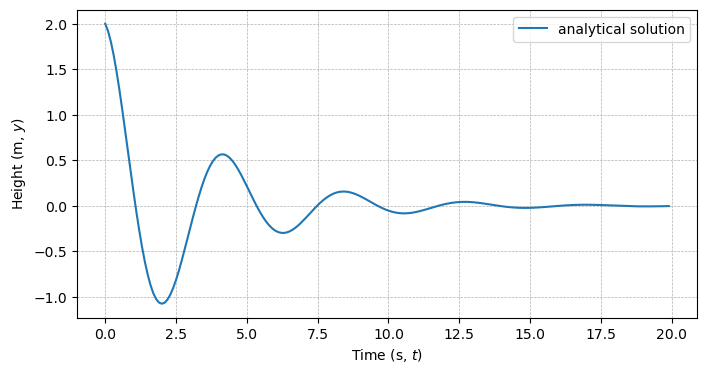

In [2]:
# define constants
m = 1
k = 2.25
mu = 0.6  # uncomment if pursuing the challenge option

# define initial conditions
x_0 = 2  # initial position
v_0 = 0  # initial velocity

# make a time array
dt = 0.1
t = np.arange(0, 20, dt)

# compute the trajectory
x = (
    x_0
    * np.exp((-mu / (2 * m)) * t)
    * np.cos(np.sqrt((k / m) - (np.square(mu) / (4 * np.square(m)))) * t)
)

# generate the figure
# make a plot of the solution
fig = plt.figure(figsize=(8, 4))

# enter the plotting line here
plt.plot(t, x, label="analytical solution")

# format axes
plt.legend()
plt.ylabel("Height (m, $y$)")
plt.xlabel("Time (s, $t$)")
plt.grid(linestyle="--", linewidth=0.5)
plt.show()

## Part 3: Discretize the Solution

With the analytical solution in hand, next we'll work to solve the equation numerically.

In class, we saw a few different "difference methods" to approximate a derivative numerically. In this problem, write down a numerical approximation for $x''(t)$.

If you are pursuing the challenge option, then also write down a numerical approximation for $x'(t)$. 

As above, you can either write you equations here or on a page submitted to Canvas.


### Solution:

$$
\frac{d^2}{dt^2} \left[ x(t) \right] \approx \frac{x(t + \Delta t) - 2 x(t) + x(t - \Delta t)}{(\Delta t)^2}
$$

$$
x(t) = x_0 \exp\left( -\frac{\mu}{2m}t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2} }t \right)
$$

$$
x(t + \Delta t) = x_0 \exp \left[ \frac{-\mu}{2m} (t + \Delta t) \right] \cos \left[ \sqrt{\frac{k}{m} - \frac{\mu^2}{4 m^2}} (t + \Delta t) \right]
$$

$$
x(t - \Delta t) = x_0 \exp \left[ \frac{-\mu}{2m} (t - \Delta t) \right] \cos \left[ \sqrt{\frac{k}{m} - \frac{\mu^2}{4 m^2}} (t - \Delta t) \right]
$$

$$
\begin{align}
\frac{d^2}{dt^2} \left[ x(t) \right] &\approx \frac{x(t + \Delta t) - 2 x(t) + x(t - \Delta t)}{(\Delta t)^2} \\
&\approx \frac{\left\{x_0 \exp \left[ \frac{-\mu}{2m} (t + \Delta t) \right] \cos \left[ \sqrt{\frac{k}{m} - \frac{\mu^2}{4 m^2}} (t + \Delta t) \right] \right\} - 2 \left[x_0 \exp\left( -\frac{\mu}{2m}t \right) \cos\left( \sqrt{\frac{k}{m} - \frac{\mu^2}{4m^2} }t \right) \right] + \left\{x_0 \exp \left[ \frac{-\mu}{2m} (t - \Delta t) \right] \cos \left[ \sqrt{\frac{k}{m} - \frac{\mu^2}{4 m^2}} (t - \Delta t) \right] \right\}}{(\Delta t)^2}
\end{align}
$$

$$
\begin{align}
\frac{d}{dt} \left[ x(t) \right] &\approx \frac{x(t + \Delta t) - x(t - \Delta t)}{2 \Delta t} \\
&\approx \frac{\left\{x_0 \exp \left[ \frac{-\mu}{2m} (t + \Delta t) \right] \cos \left[ \sqrt{\frac{k}{m} - \frac{\mu^2}{4 m^2}} (t + \Delta t) \right] \right\} - \left\{x_0 \exp \left[ \frac{-\mu}{2m} (t - \Delta t) \right] \cos \left[ \sqrt{\frac{k}{m} - \frac{\mu^2}{4 m^2}} (t - \Delta t) \right] \right\}}{2 \Delta t}
\end{align}
$$

## Part 4: Derive a time-stepping scheme

Now that you've got an approximation for $x''(t)$ (and $x'(t)$ for option 2), substitute this approximation into the differential equation and derive a time-stepping scheme. In other words, one side of your equation should have the term $x(t+\Delta t)$ and the other side of your equation should have other terms that do not include $x(t+\Delta t)$. This will allow you to estimate $x$ at a time $\Delta t$ seconds further in the future:

As above, you can either write your equations here or on a page submitted to Canvas.



### Solution:

Differential Equation:

$$
x''(t) + \frac{\mu}{m}x'(t) + \frac{k}{m}x(t) = 0
$$

Substitute:

$$
\frac{d^2}{dt^2} \left[ x(t) \right] + \frac{\mu}{m} \left\{ \frac{d}{dt} \left[ x(t) \right] \right\} + \frac{k}{m}x(t) = \left( \frac{x (t + \Delta t) - 2 x (t) + x ( t - \Delta t)}{(\Delta t)^2} \right) + \frac{\mu}{m} \left( \frac{x (t + \Delta t) - x (t - \Delta t)}{2 \Delta t} \right) + \frac{k}{m} x(t)
$$

Multiply both sides by $(\Delta t)^2$

$$
\begin{align}
(\Delta t)^2 \left\{ \left( \frac{x (t + \Delta t) - 2 x (t) + x ( t - \Delta t)}{(\Delta t)^2} \right) + \frac{\mu}{m} \left( \frac{x (t + \Delta t) - x (t - \Delta t)}{2 \Delta t} \right) + \frac{k}{m} x(t) \right\} &= 0 (\Delta t)^2 \\
[x (t + \Delta t) - 2 x (t) + x ( t - \Delta t)] + \frac{\mu \Delta t}{2m} [ x (t + \Delta t) - x (t - \Delta t)] + \frac{k (\Delta t)^2}{m} x(t) &= 0 \\
x (t + \Delta t) - 2 x (t) + x ( t - \Delta t) + \frac{\mu \Delta t}{2m} [ x (t + \Delta t)] - \frac{\mu \Delta t}{2m} [x (t - \Delta t)] + \frac{k (\Delta t)^2}{m} x(t) &= 0 \\
x (t + \Delta t) + \frac{\mu \Delta t}{2m} [ x (t + \Delta t)] &= - \frac{k (\Delta t)^2}{m} x(t) + \frac{\mu \Delta t}{2m} [x (t - \Delta t)] + 2 x (t) - x ( t - \Delta t) \\
x (t + \Delta t) \left( 1 + \frac{\mu \Delta t}{2m} \right) &= 2 x (t) - \frac{k (\Delta t)^2}{m} x(t) + \left( \frac{\mu \Delta t}{2m} - 1 \right) x ( t - \Delta t) \\
x (t + \Delta t) &= \frac{2 x (t) - \frac{k (\Delta t)^2}{m} x(t) + \left( \frac{\mu \Delta t}{2m} - 1 \right) x ( t - \Delta t)}{1 + \frac{\mu \Delta t}{2m}} \\
x (t + \Delta t) &= \frac{ \left[ 2 - \frac{k (\Delta t)^2}{m} \right] x(t) + \left( \frac{\mu \Delta t}{2m} - 1 \right) x ( t - \Delta t)}{1 + \frac{\mu \Delta t}{2m}}
\end{align}
$$

$$
\begin{align}
\text{Let } \alpha &= \frac{\mu \Delta t}{2m} \\
\text{Let } \beta &= \frac{k (\Delta t)^2}{m}
\end{align}
$$

$$
x (t + \Delta t) = \frac{(2 - \beta) \; x(t) + (\alpha - 1) \; x(t - \Delta t)}{1 + \alpha}
$$

## Part 5: Numerical Solution

Using your timestepping scheme, create a numerical solution to the differential equation for the timesteps given in the array below.

Note that your solution will start at $t=0$ but your timestepping scheme will have a term for $x(t-\Delta t)$. In this case, substitute $x(0)$ for $x(-\Delta t)$ for the first timestep only.

### Solution:

In [3]:
# make a time array for the iteration
delta_t_part05 = 0.1
n_timestep_part05 = int(20 / delta_t_part05)


def numerical_solution(delta_t, n_timestep):
    # bottom-up approach: solve individual components
    alpha = (mu * delta_t) / (2 * m)
    beta = (k * np.square(delta_t)) / m

    # make an empty array to store the solution
    x_solution = np.zeros((n_timestep,))

    # start the solution with the initial position
    x_solution[0] = x_0
    x_solution[1] = ((2 - beta) * x_solution[0] + (alpha - 1) * x_solution[0]) / (
        1 + alpha
    )

    # loop through the total number of timestep
    for i in range(1, n_timestep - 1):
        # estimate the next position
        x_next = ((2 - beta) * x_solution[i] + (alpha - 1) * x_solution[i - 1]) / (
            1 + alpha
        )

        # fill in the solution array at the next position with the estimate
        x_solution[i + 1] = x_next

    return x_solution


x_solution_part05 = numerical_solution(delta_t_part05, n_timestep_part05)

## Part 6: Numerical Solution

Now, plot the numerical solution on the same plot as the analytical solution to compare results. Note that you can copy/paste/edit your plotting code from above here.

### Solution:

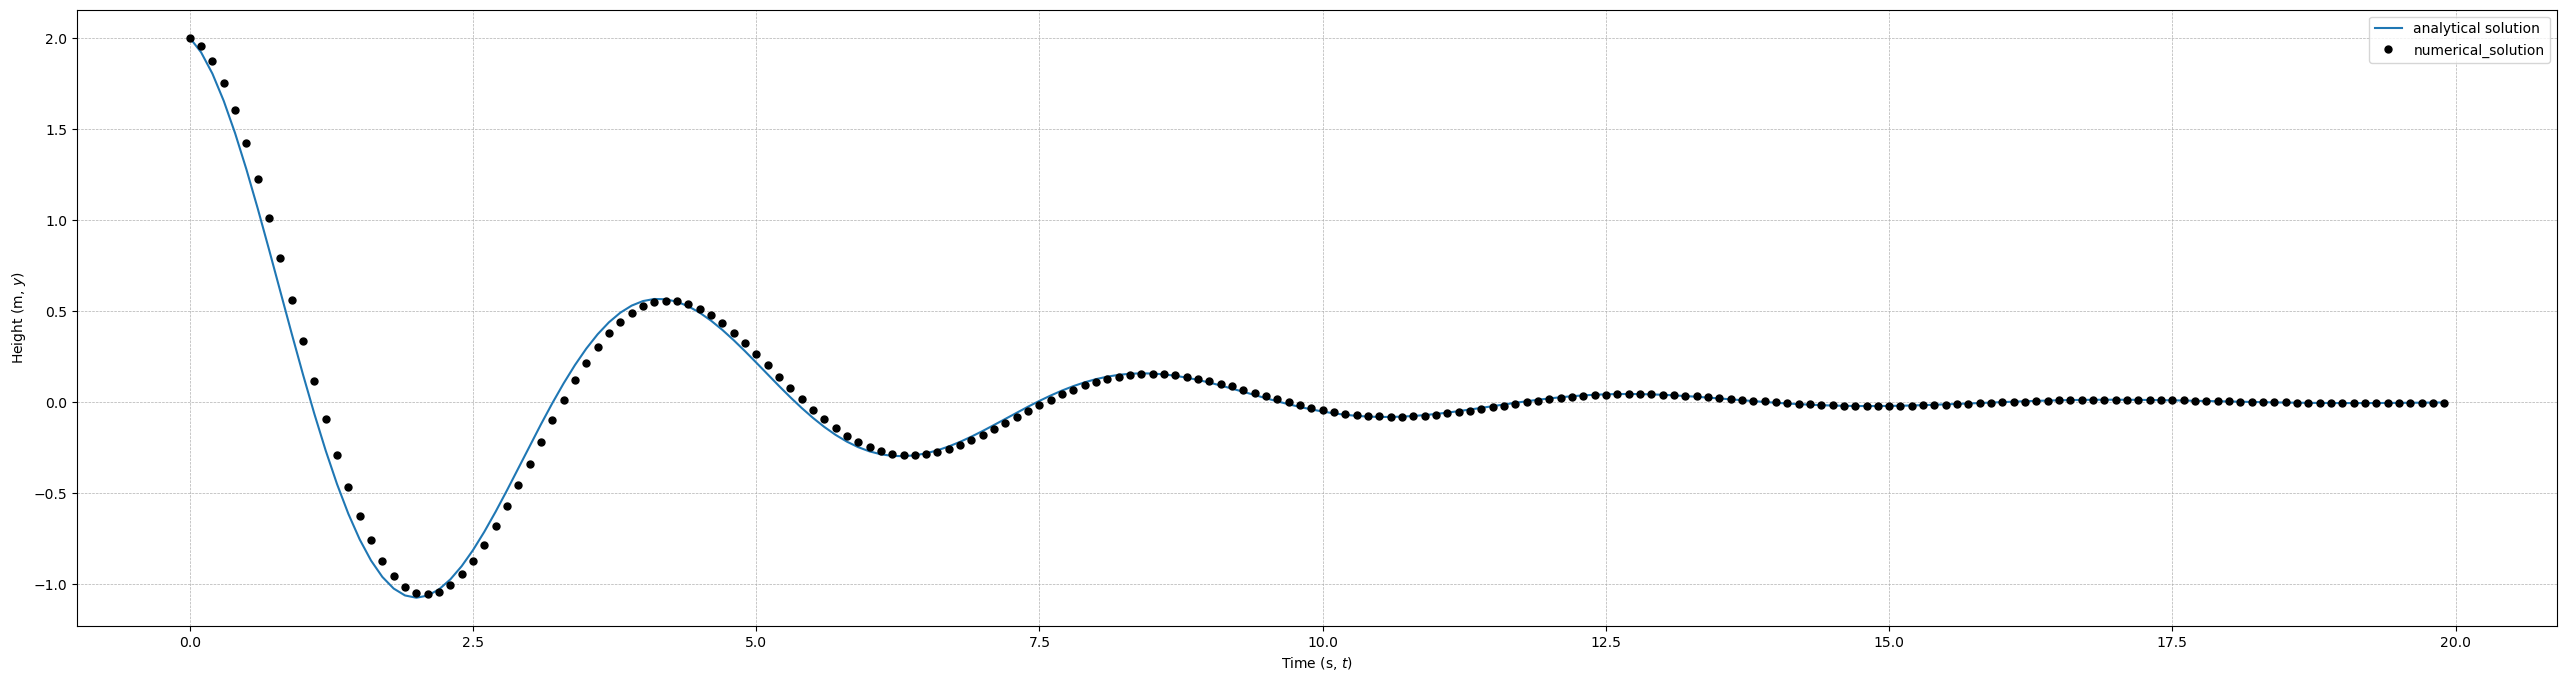

In [4]:
t_solution_part06 = np.arange(0, n_timestep_part05 * delta_t_part05, delta_t_part05)


def plot_numerical_solution(t_solution, x_solution):

    plt.figure(figsize=(32, 8))

    plt.plot(t, x, label="analytical solution")

    plt.plot(t_solution, x_solution, "k.", markersize=10, label="numerical_solution")

    plt.legend()

    plt.ylabel("Height (m, $y$)")

    plt.xlabel("Time (s, $t$)")

    plt.grid(linestyle="--", linewidth=0.5)

    plt.show()


plot_numerical_solution(t_solution_part06, x_solution_part05)

## Part 7: Stability of the Numerical Solution

In the solution above, the timestep $\Delta t$ given in the starter code ensures that the solution is stable. Try a few other values for $\Delta t$ to determine when the solution is stable. In other words, what range of timestep gives you values in the same range as the analytical solution? What range gives you values that cause the solution to "blow up"? What leads to these numerical instabilities?

### Solution:

In [5]:
def part07_stability_of_the_numerical_solution(delta_t):
    n_timestep = int(20 / delta_t)
    x_solution = numerical_solution(delta_t, n_timestep)
    t_solution = np.arange(0, n_timestep * delta_t, delta_t)
    plot_numerical_solution(t_solution, x_solution)

#### $\Delta t$ at 0.01

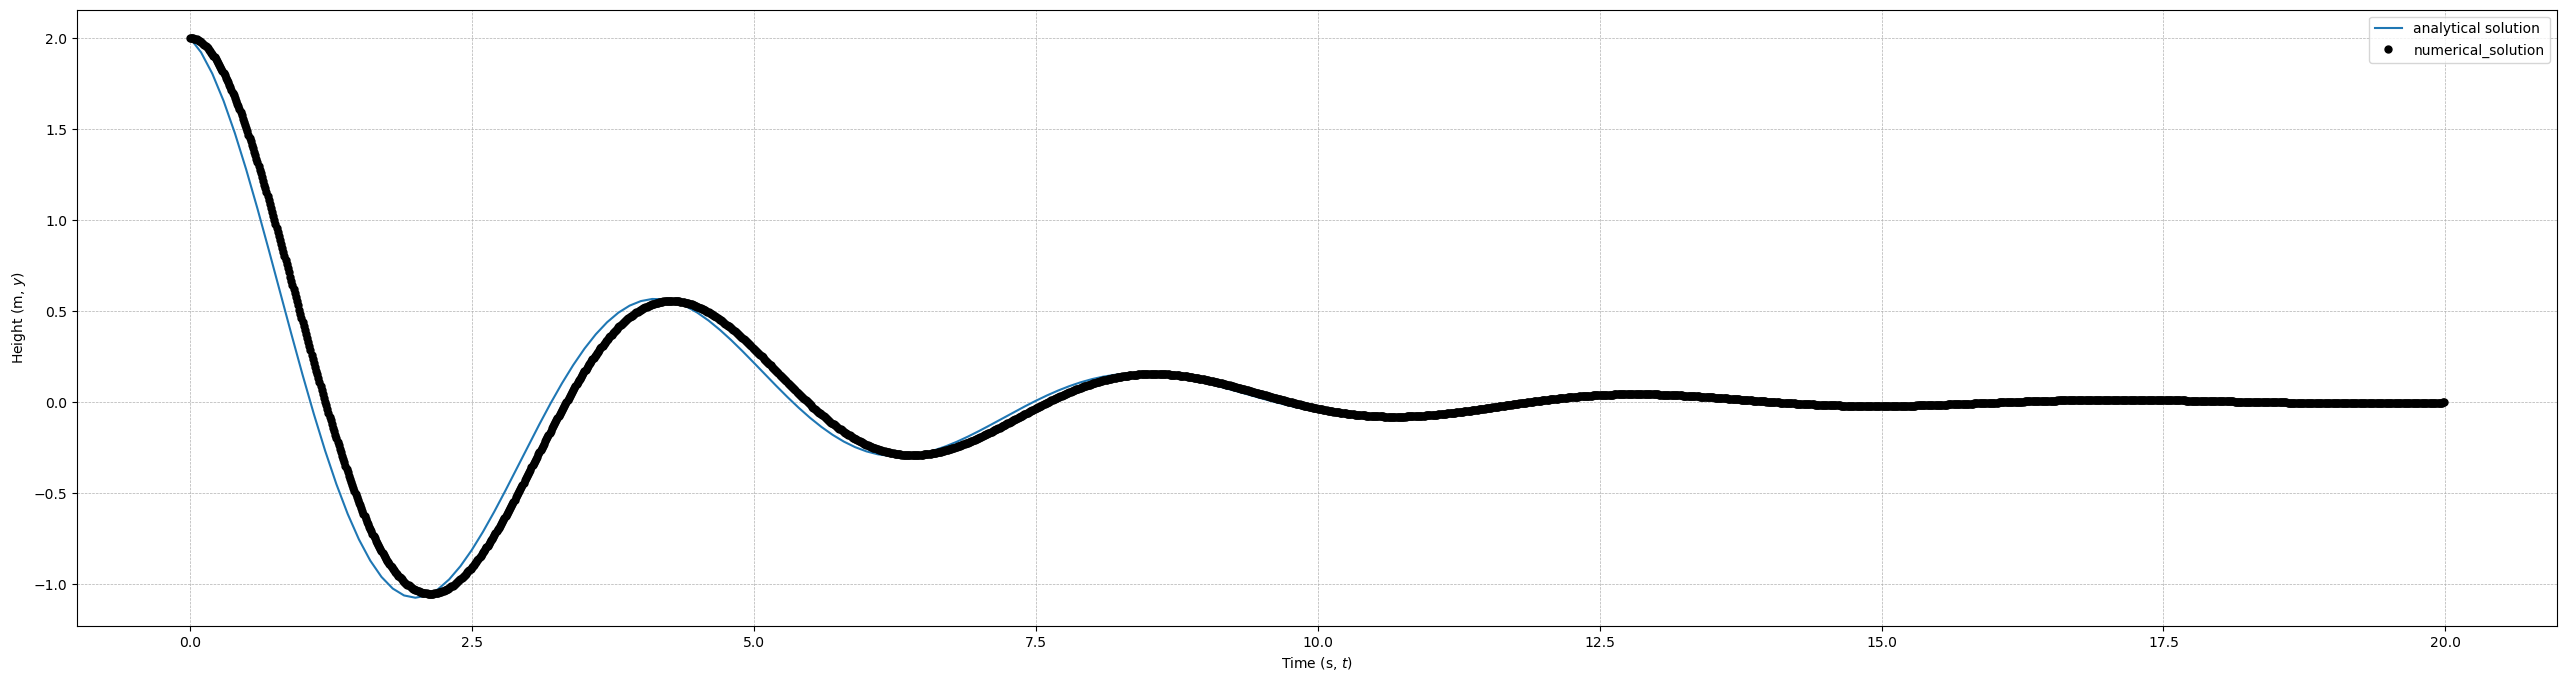

In [6]:
part07_stability_of_the_numerical_solution(0.01)

#### $\Delta t$ at 0.001

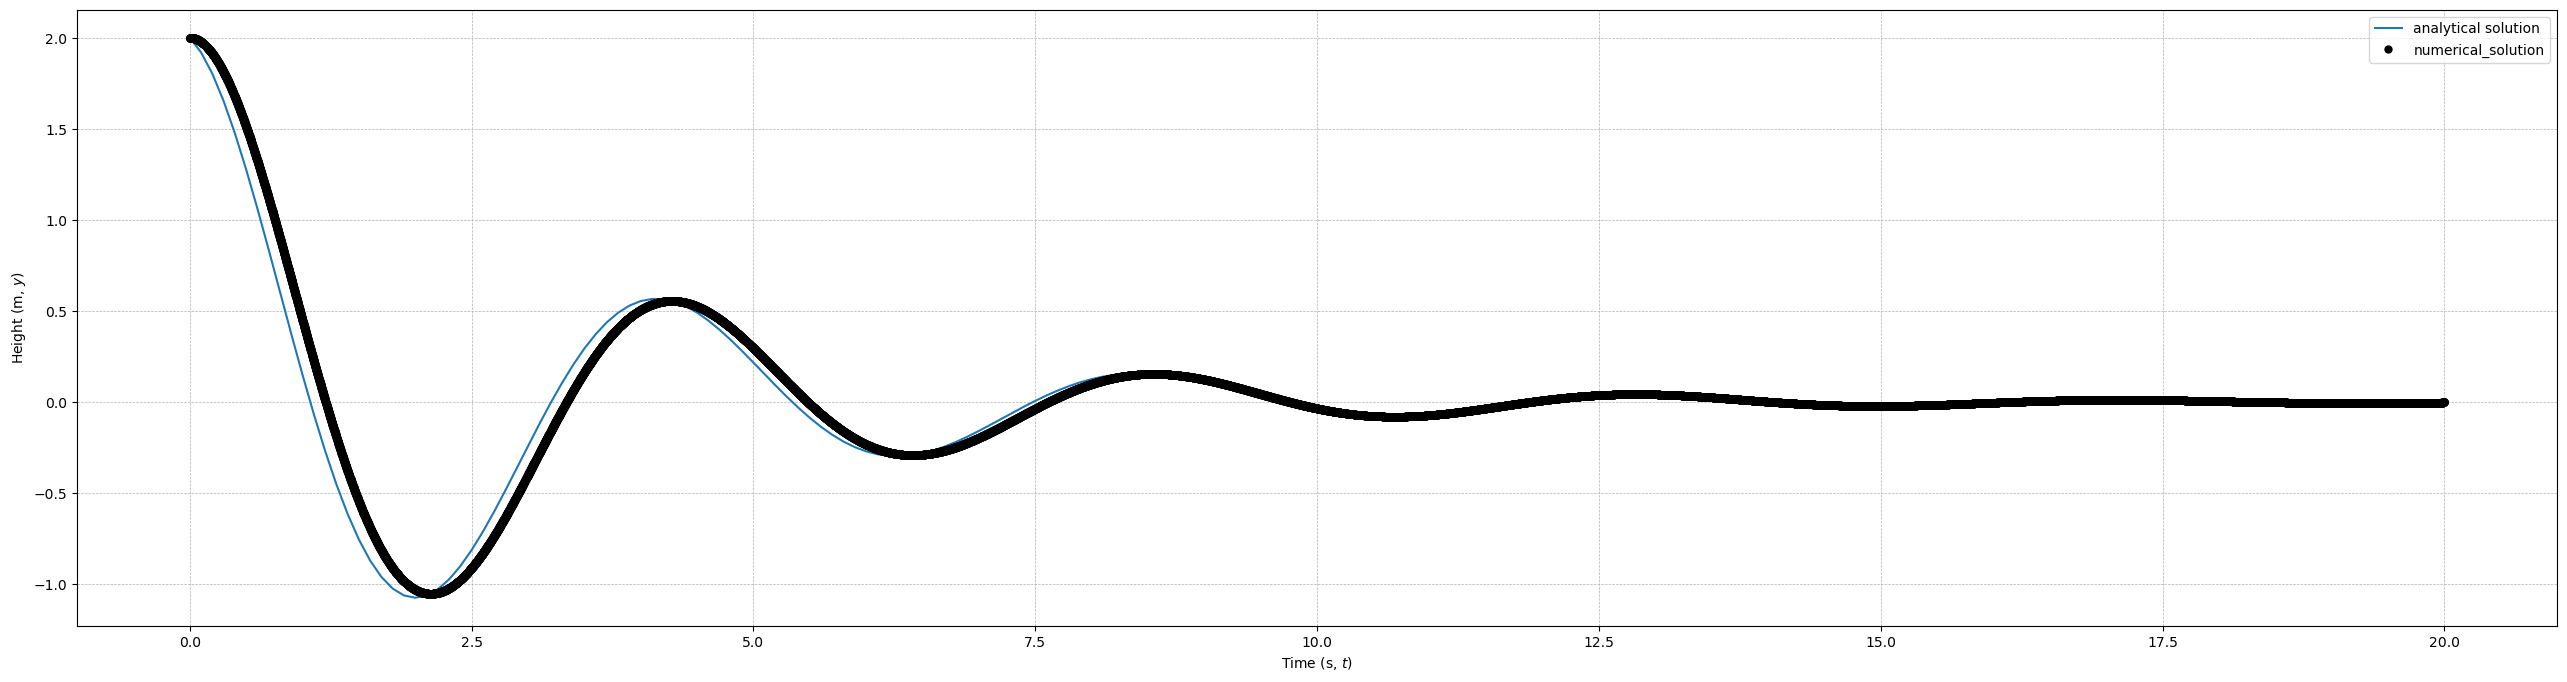

In [7]:
part07_stability_of_the_numerical_solution(0.001)

#### $\Delta t$ at 1.0

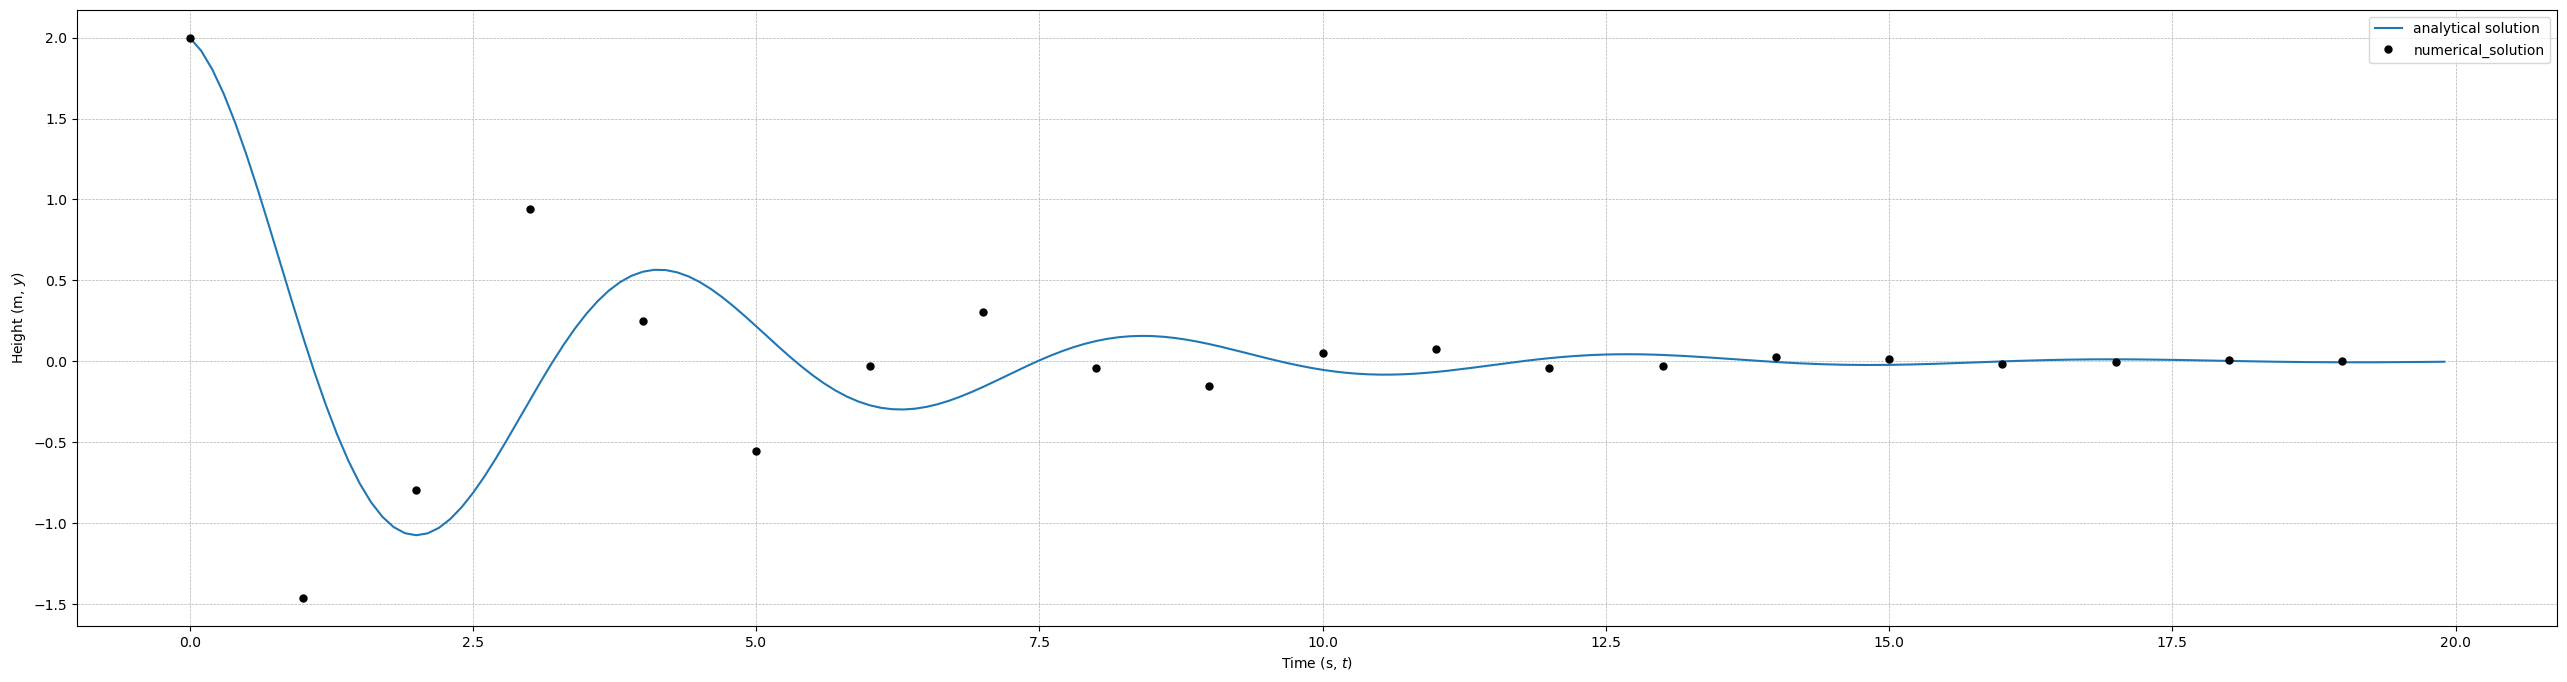

In [8]:
part07_stability_of_the_numerical_solution(1.0)

#### $\Delta t$ at 0.5

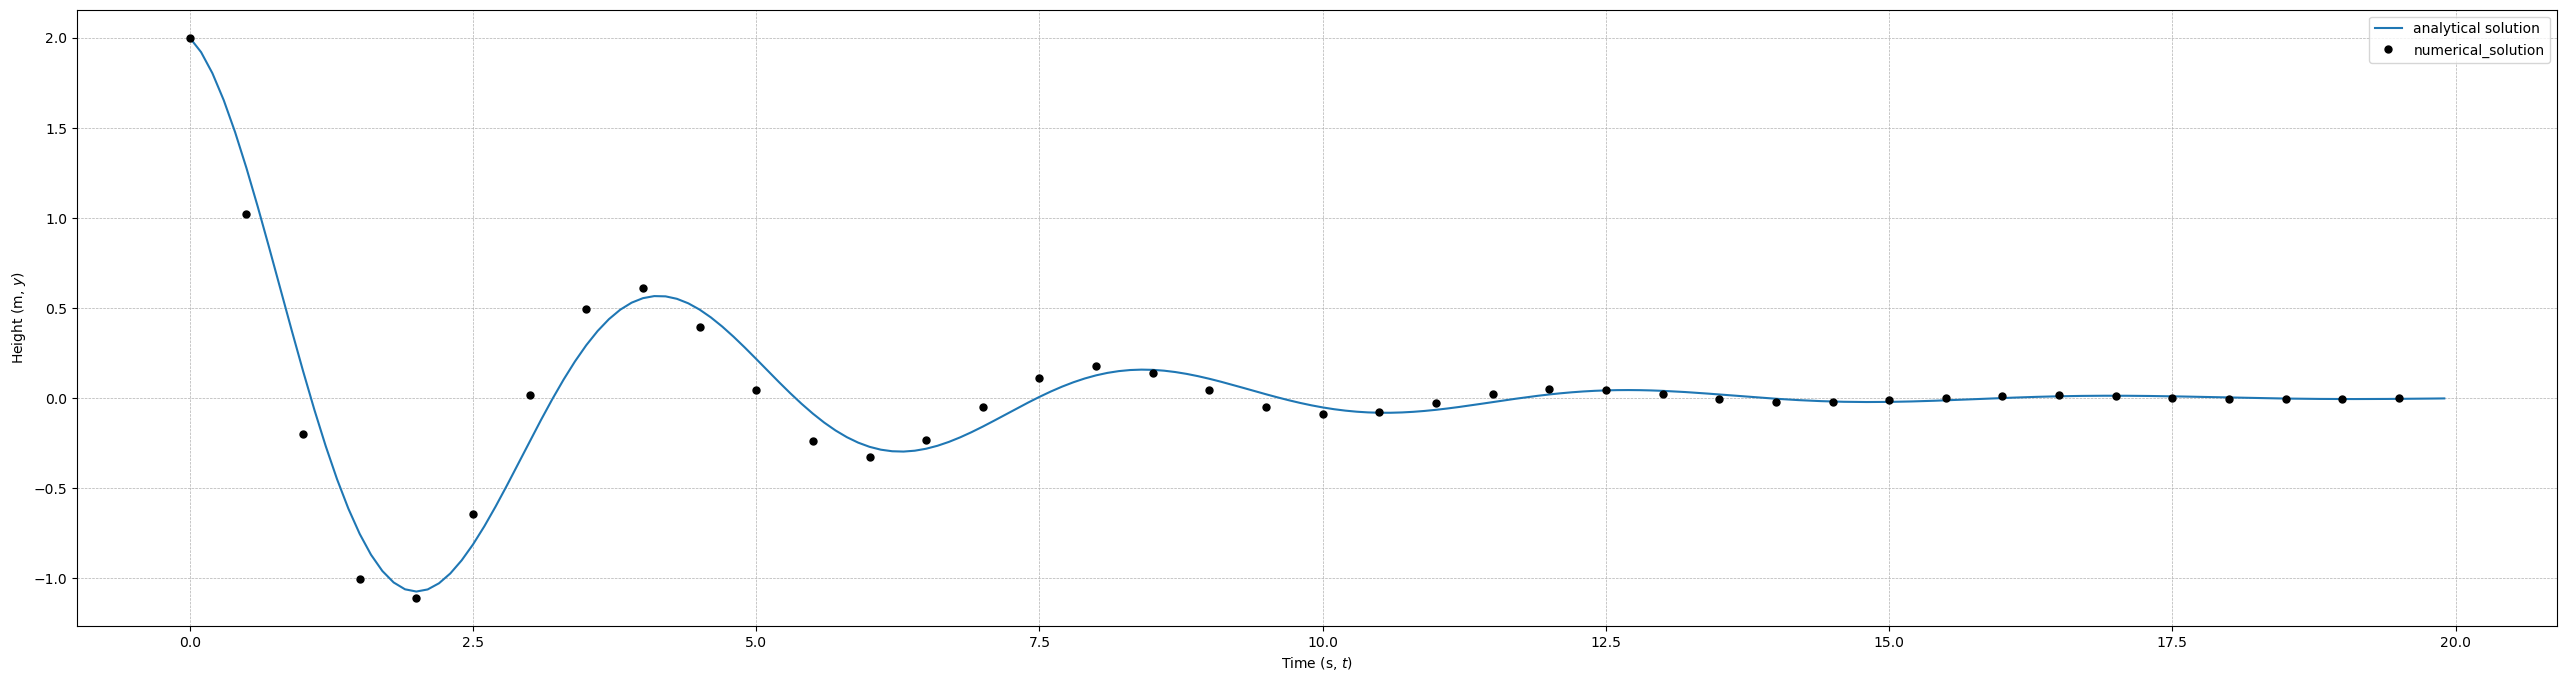

In [9]:
part07_stability_of_the_numerical_solution(0.5)

#### $\Delta t$ at 0.25

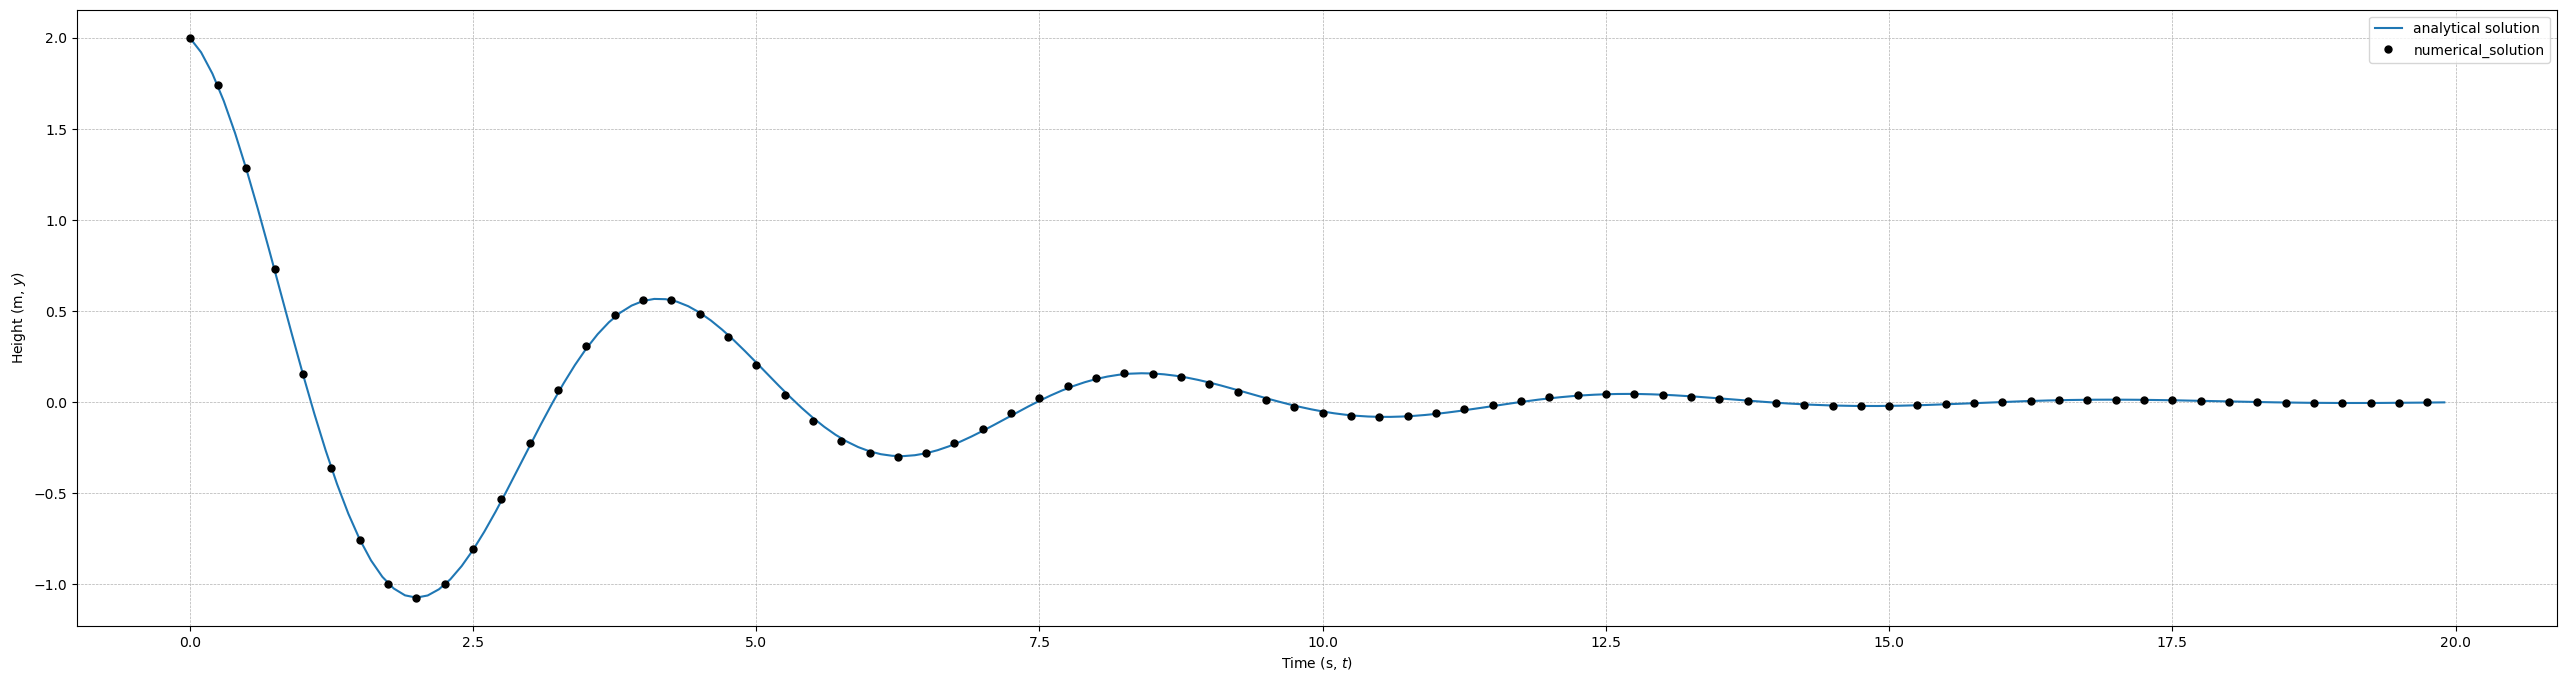

In [10]:
part07_stability_of_the_numerical_solution(0.25)

#### $\Delta t$ at 0.4

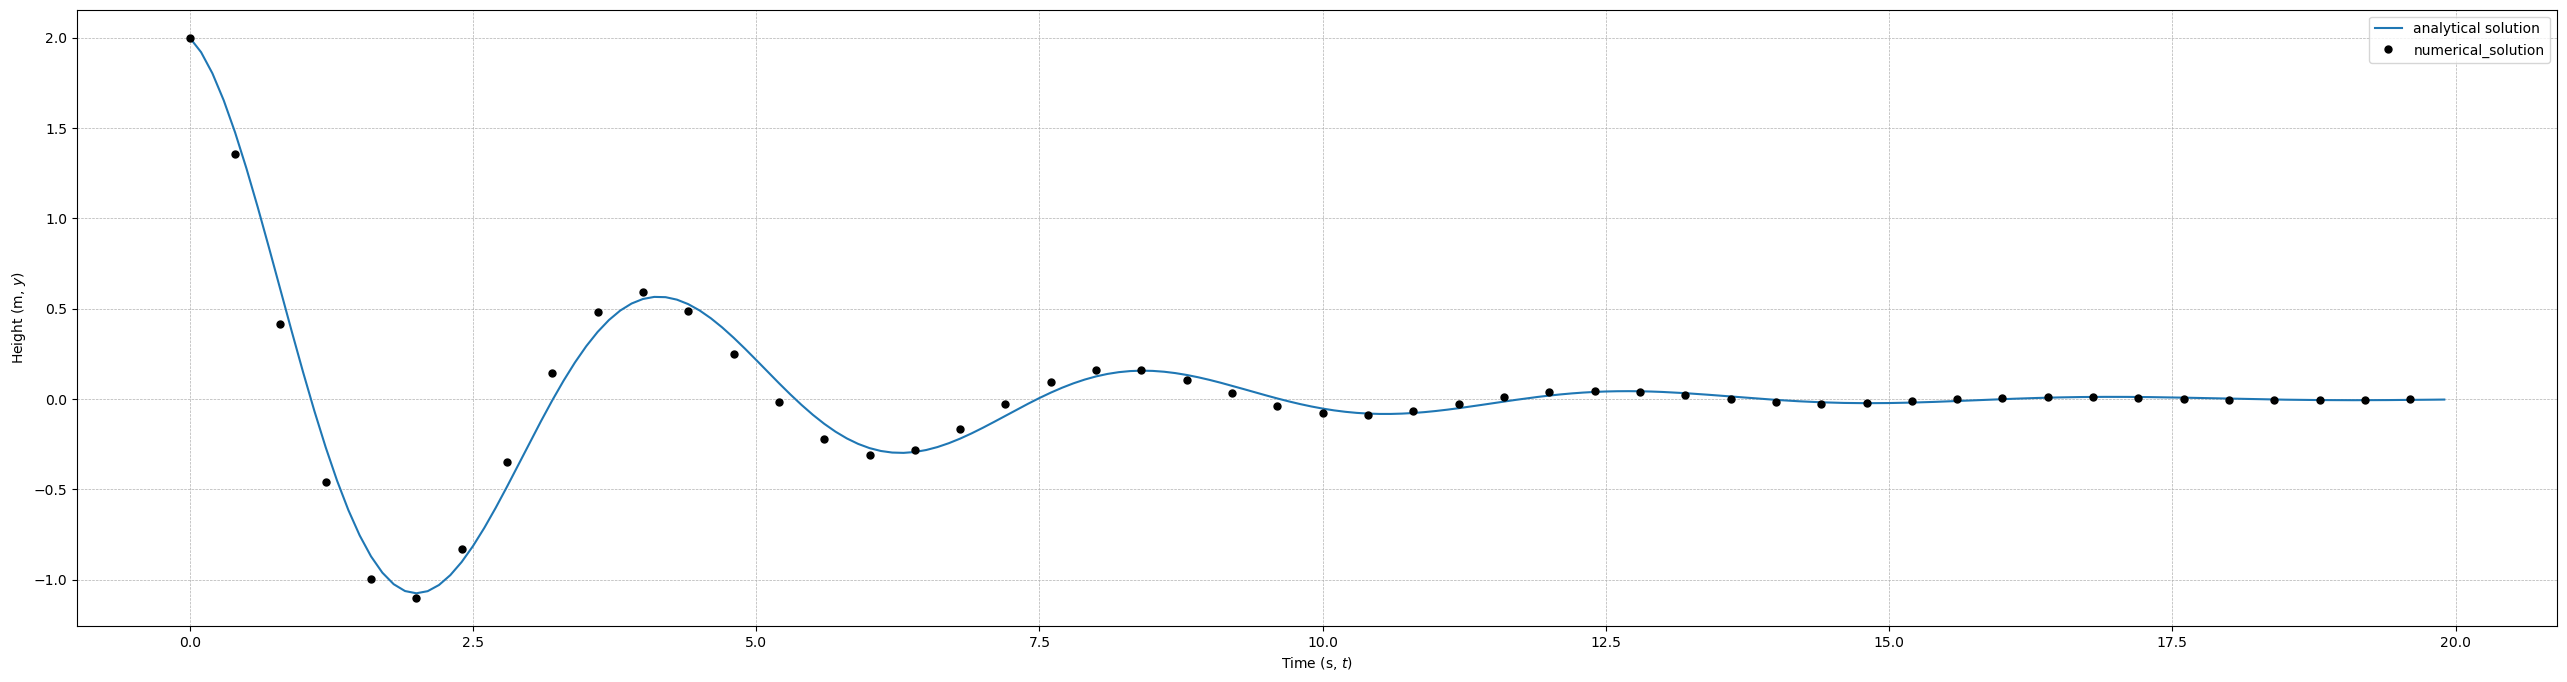

In [11]:
part07_stability_of_the_numerical_solution(0.4)

#### $\Delta t$ at 0.3

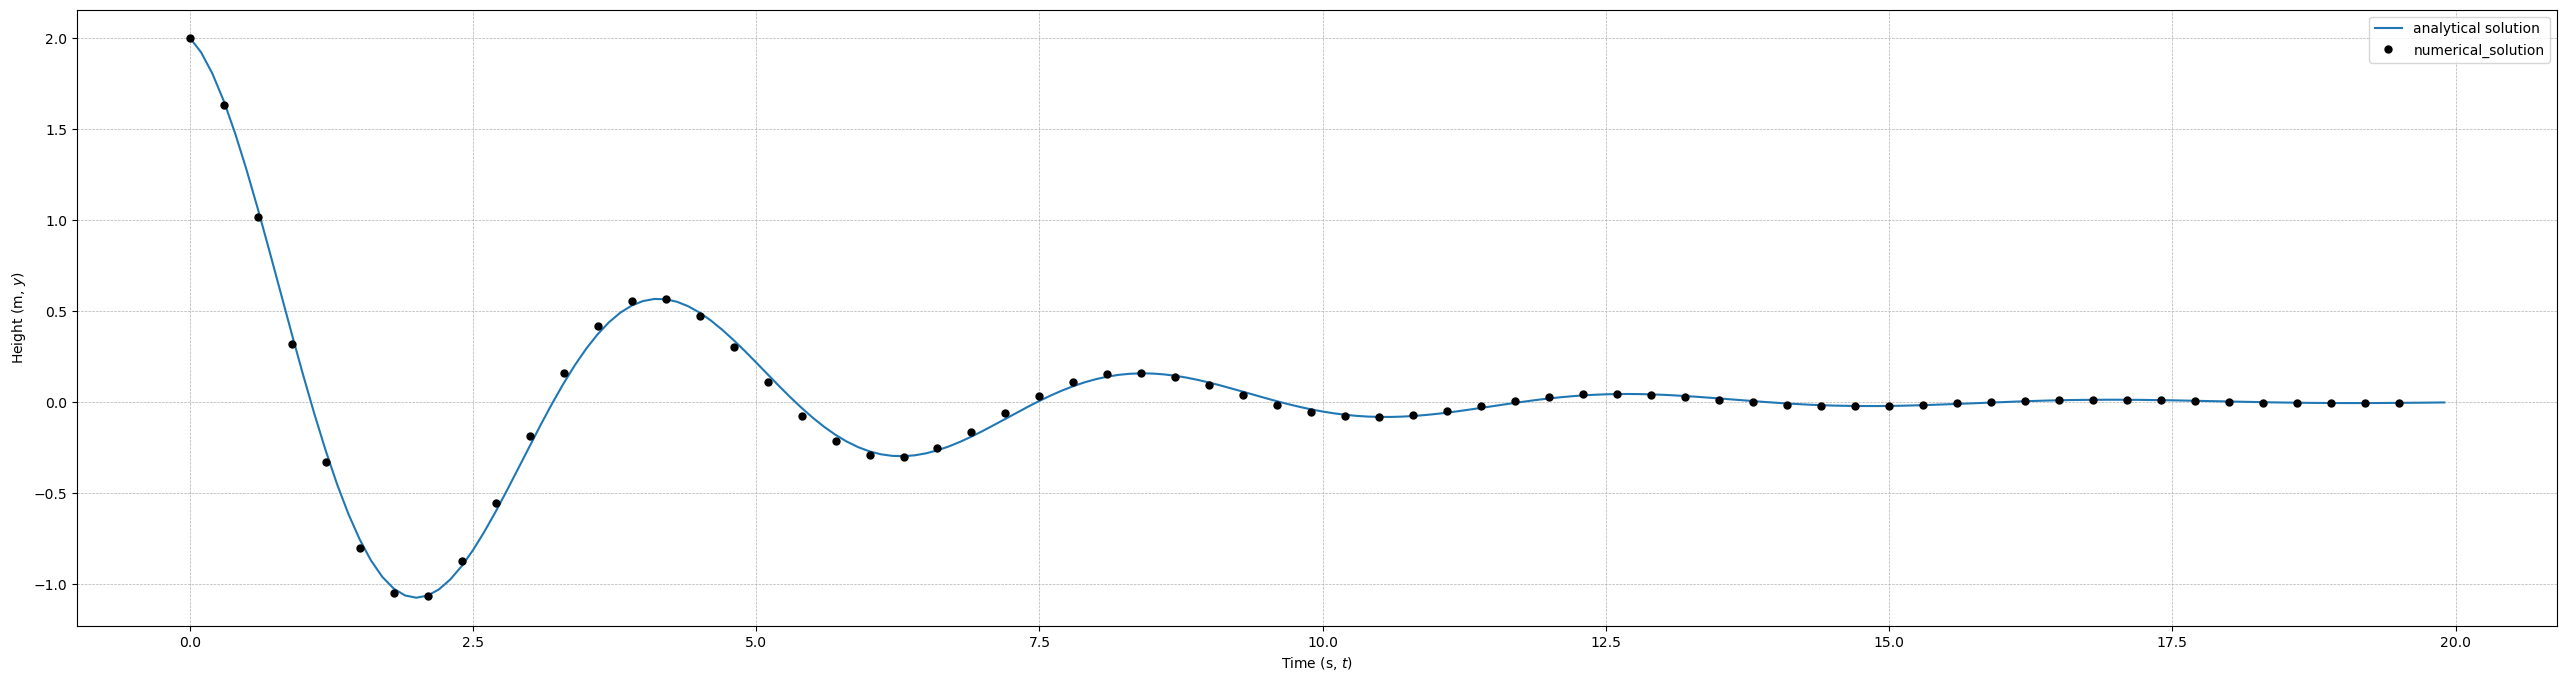

In [12]:
part07_stability_of_the_numerical_solution(0.3)

#### $\Delta t$ at 0.6

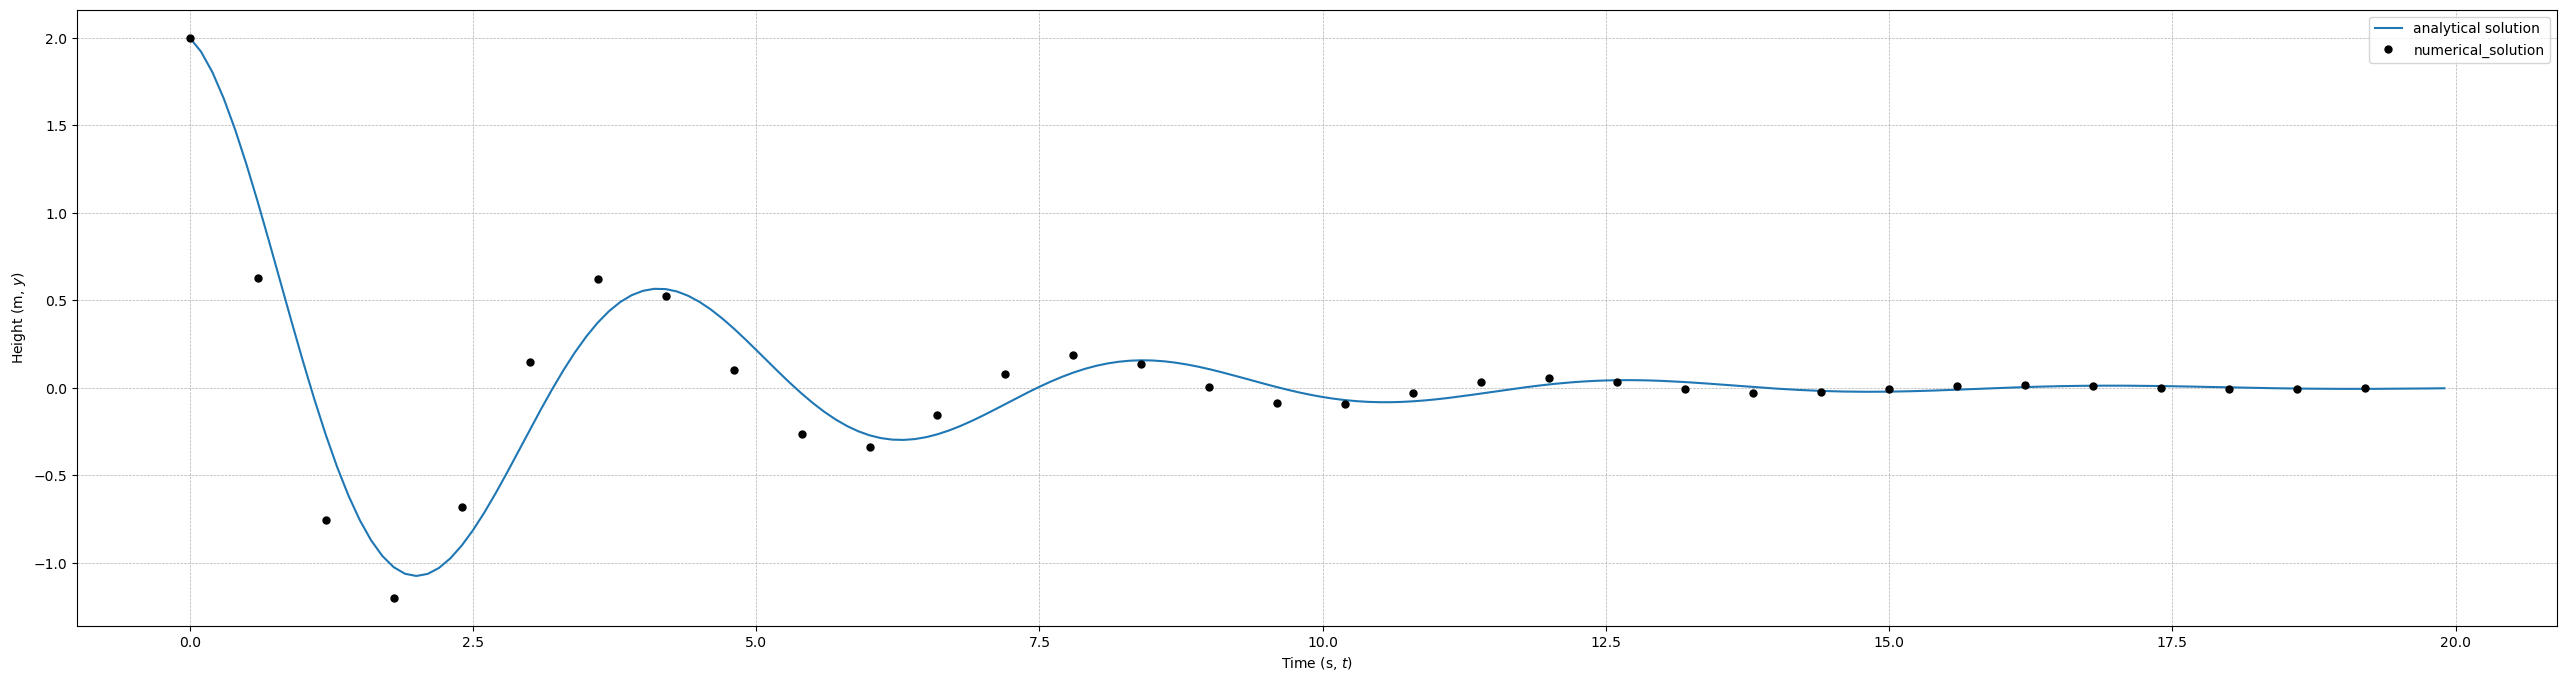

In [13]:
part07_stability_of_the_numerical_solution(0.6)

#### $\Delta t$ at 0.7

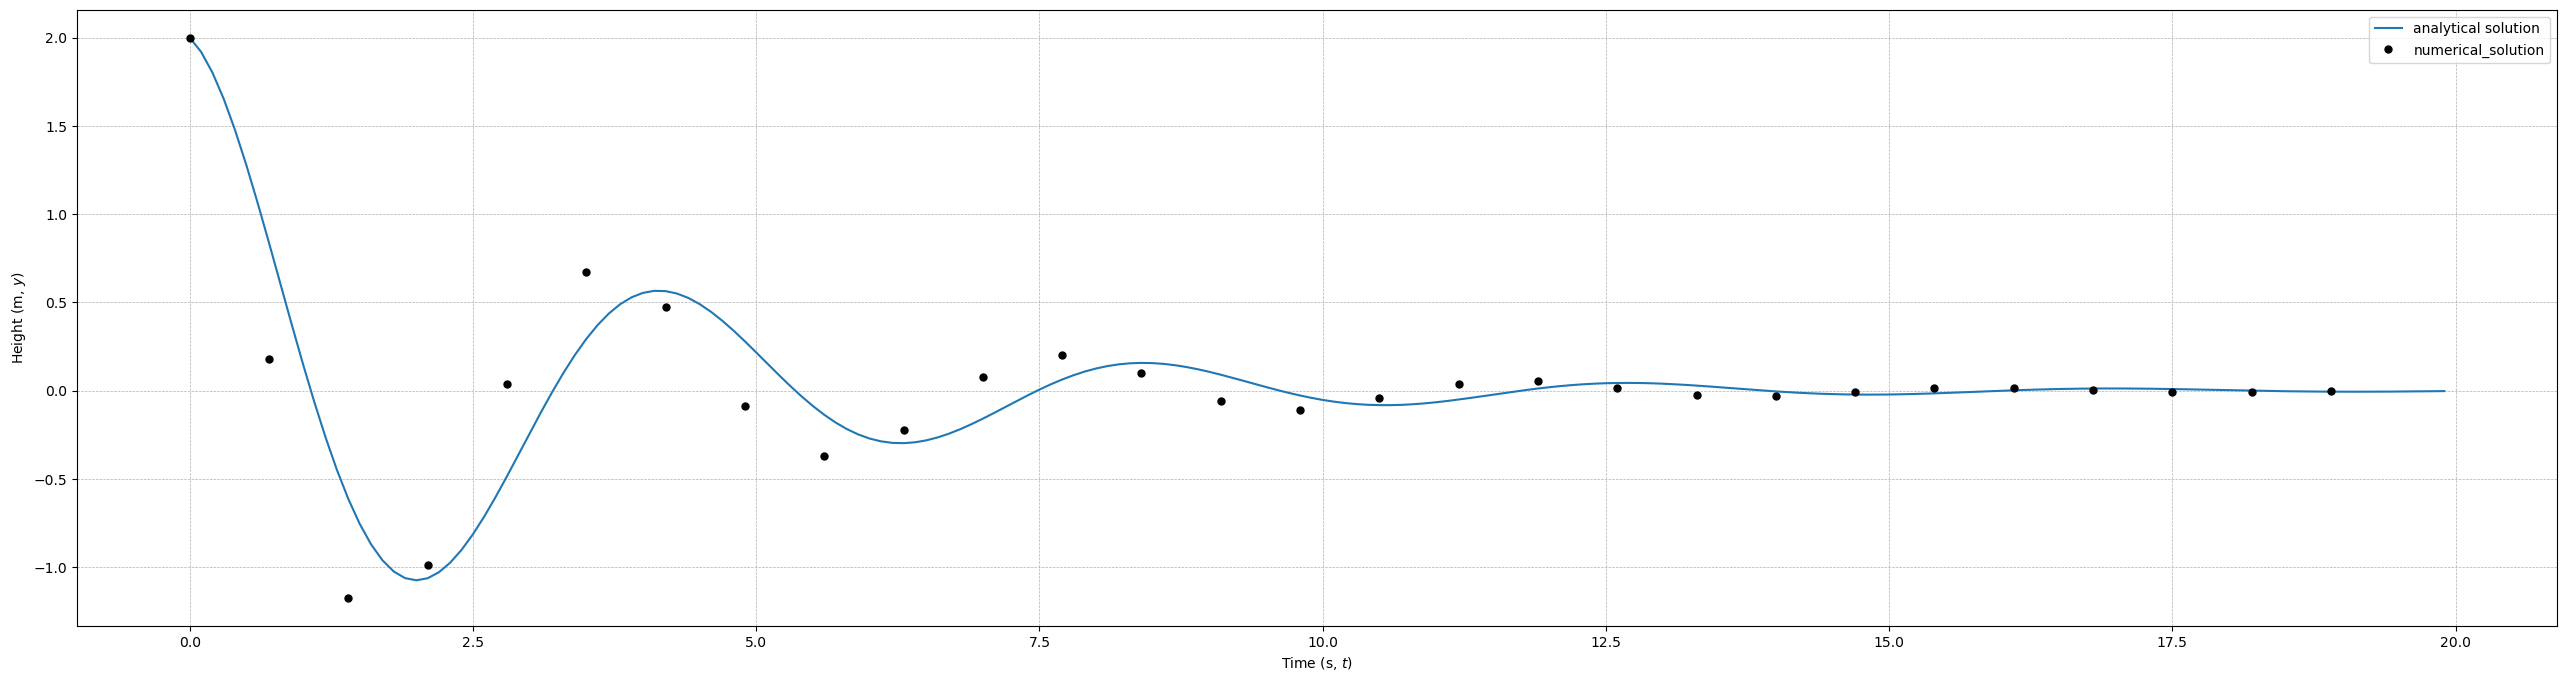

In [14]:
part07_stability_of_the_numerical_solution(0.7)

#### $\Delta t$ at 0.8

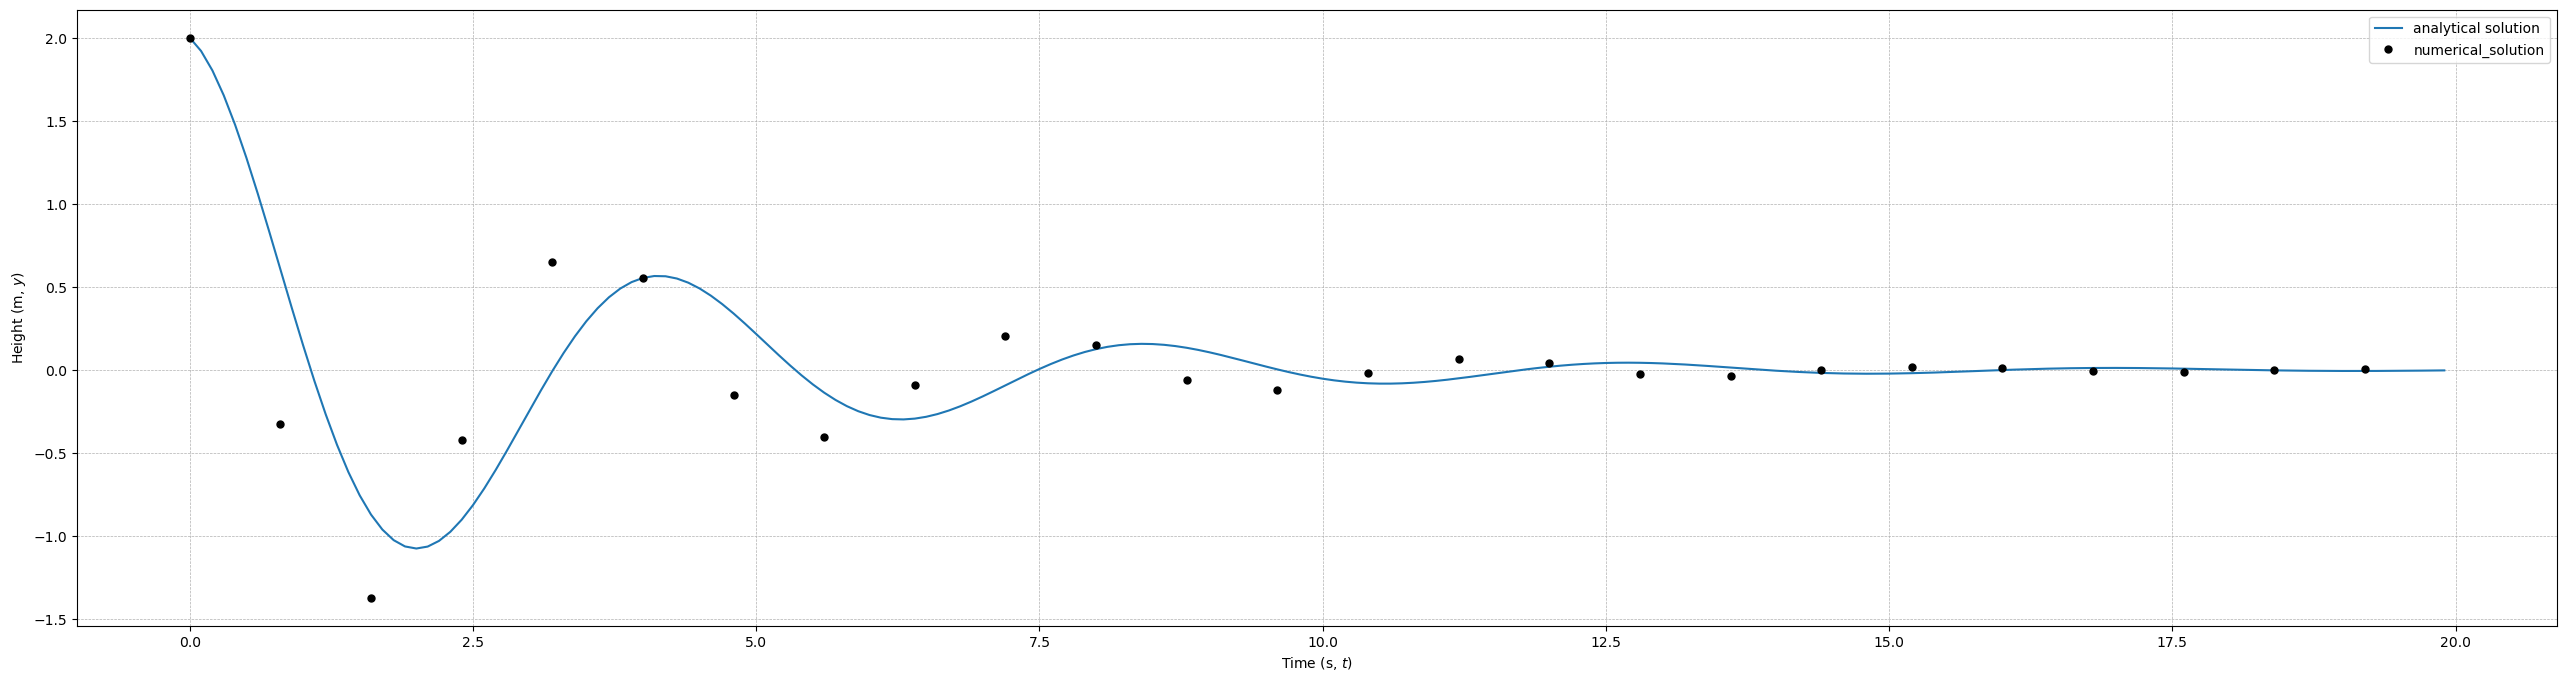

In [15]:
part07_stability_of_the_numerical_solution(0.8)

#### $\Delta t$ at 0.9

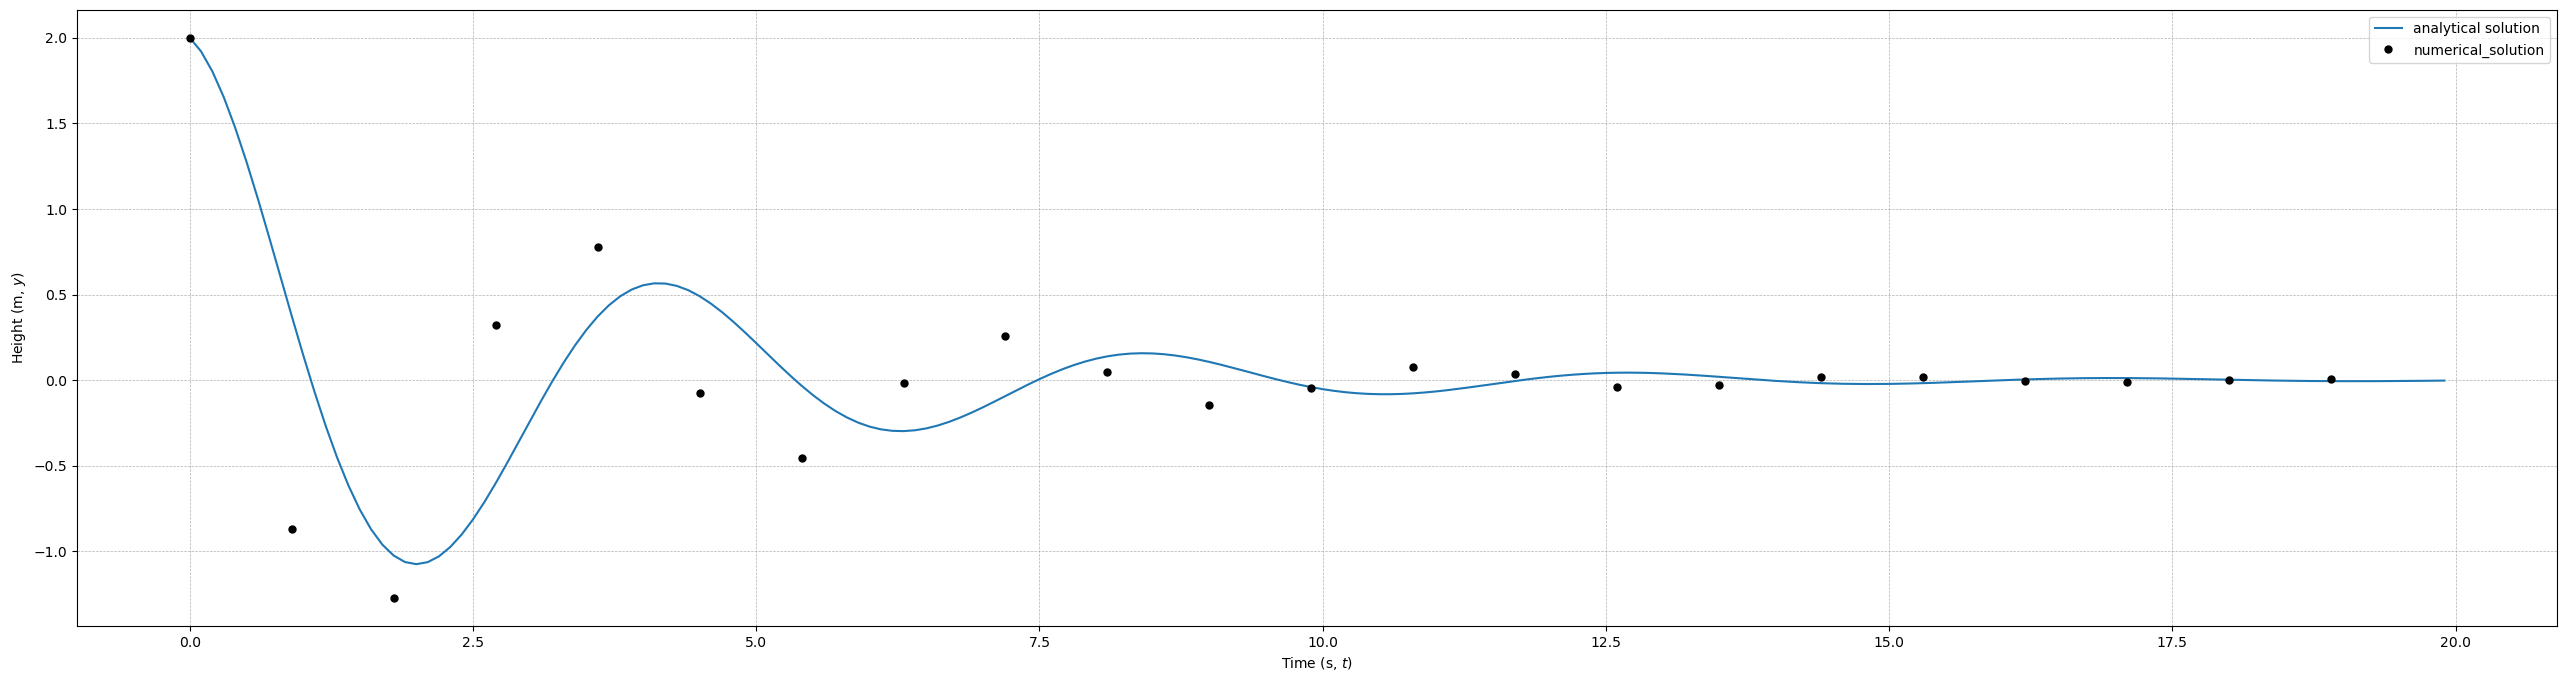

In [16]:
part07_stability_of_the_numerical_solution(0.9)

#### $\Delta t$ at 1.1

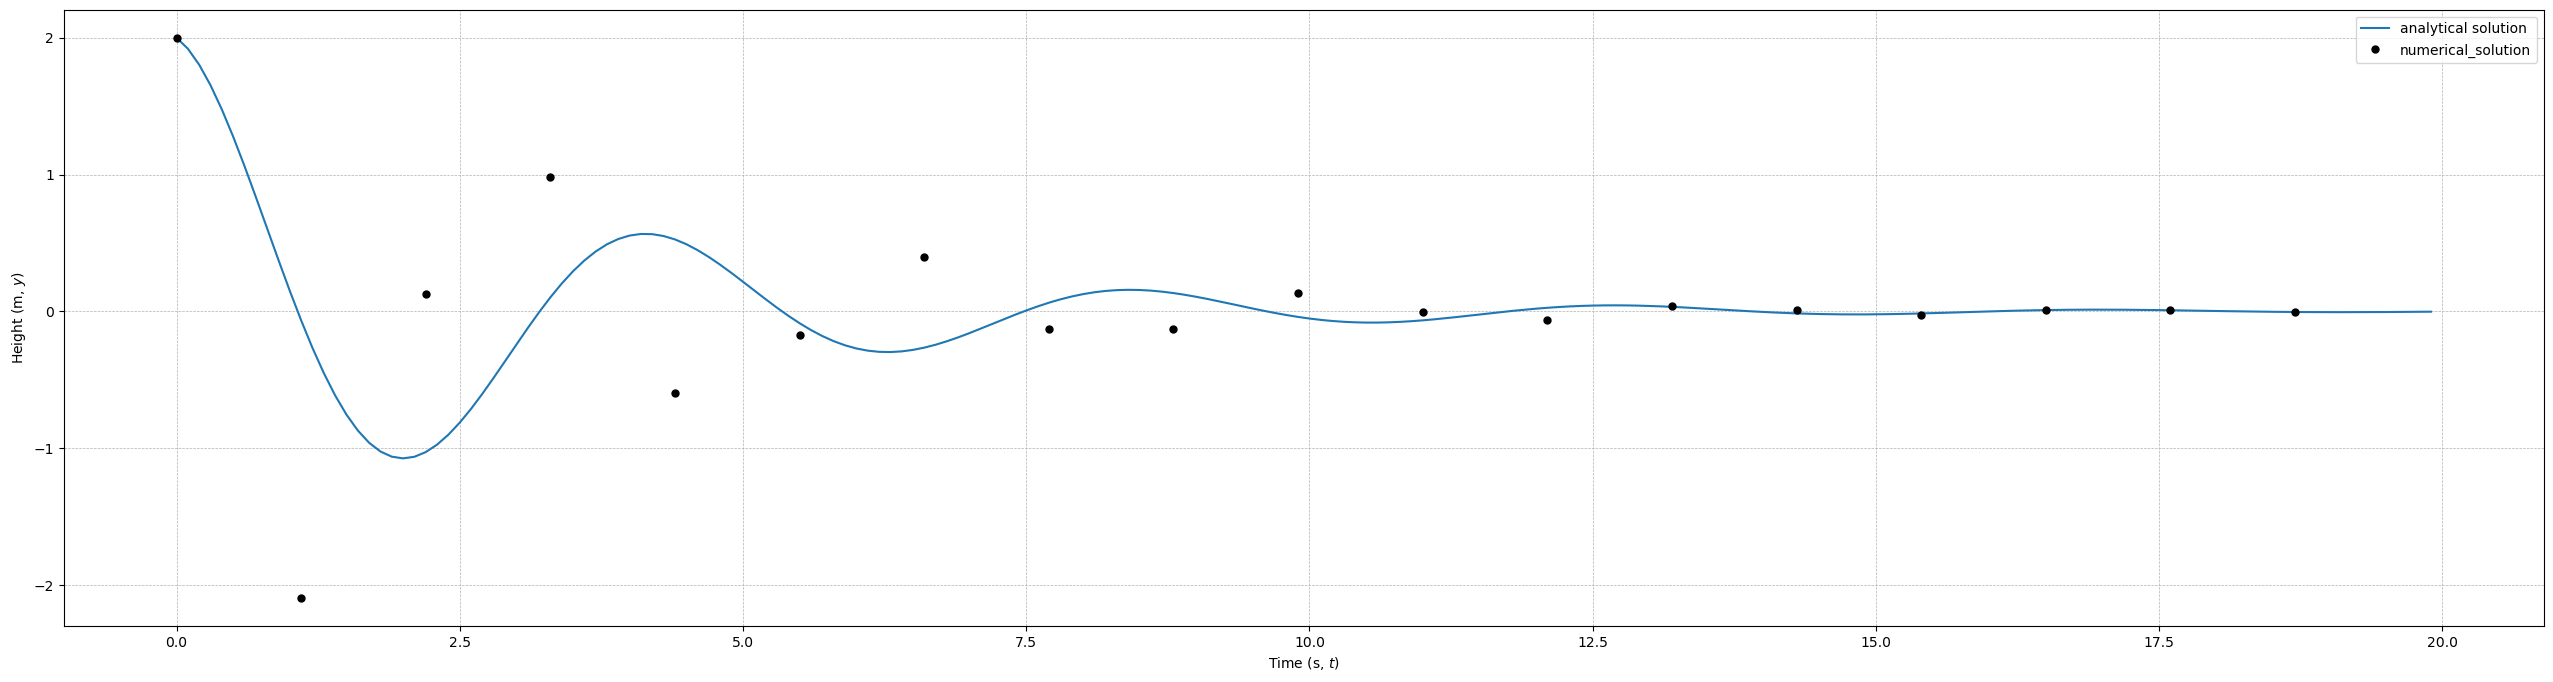

In [17]:
part07_stability_of_the_numerical_solution(1.1)

#### $\Delta t$ at 1.2

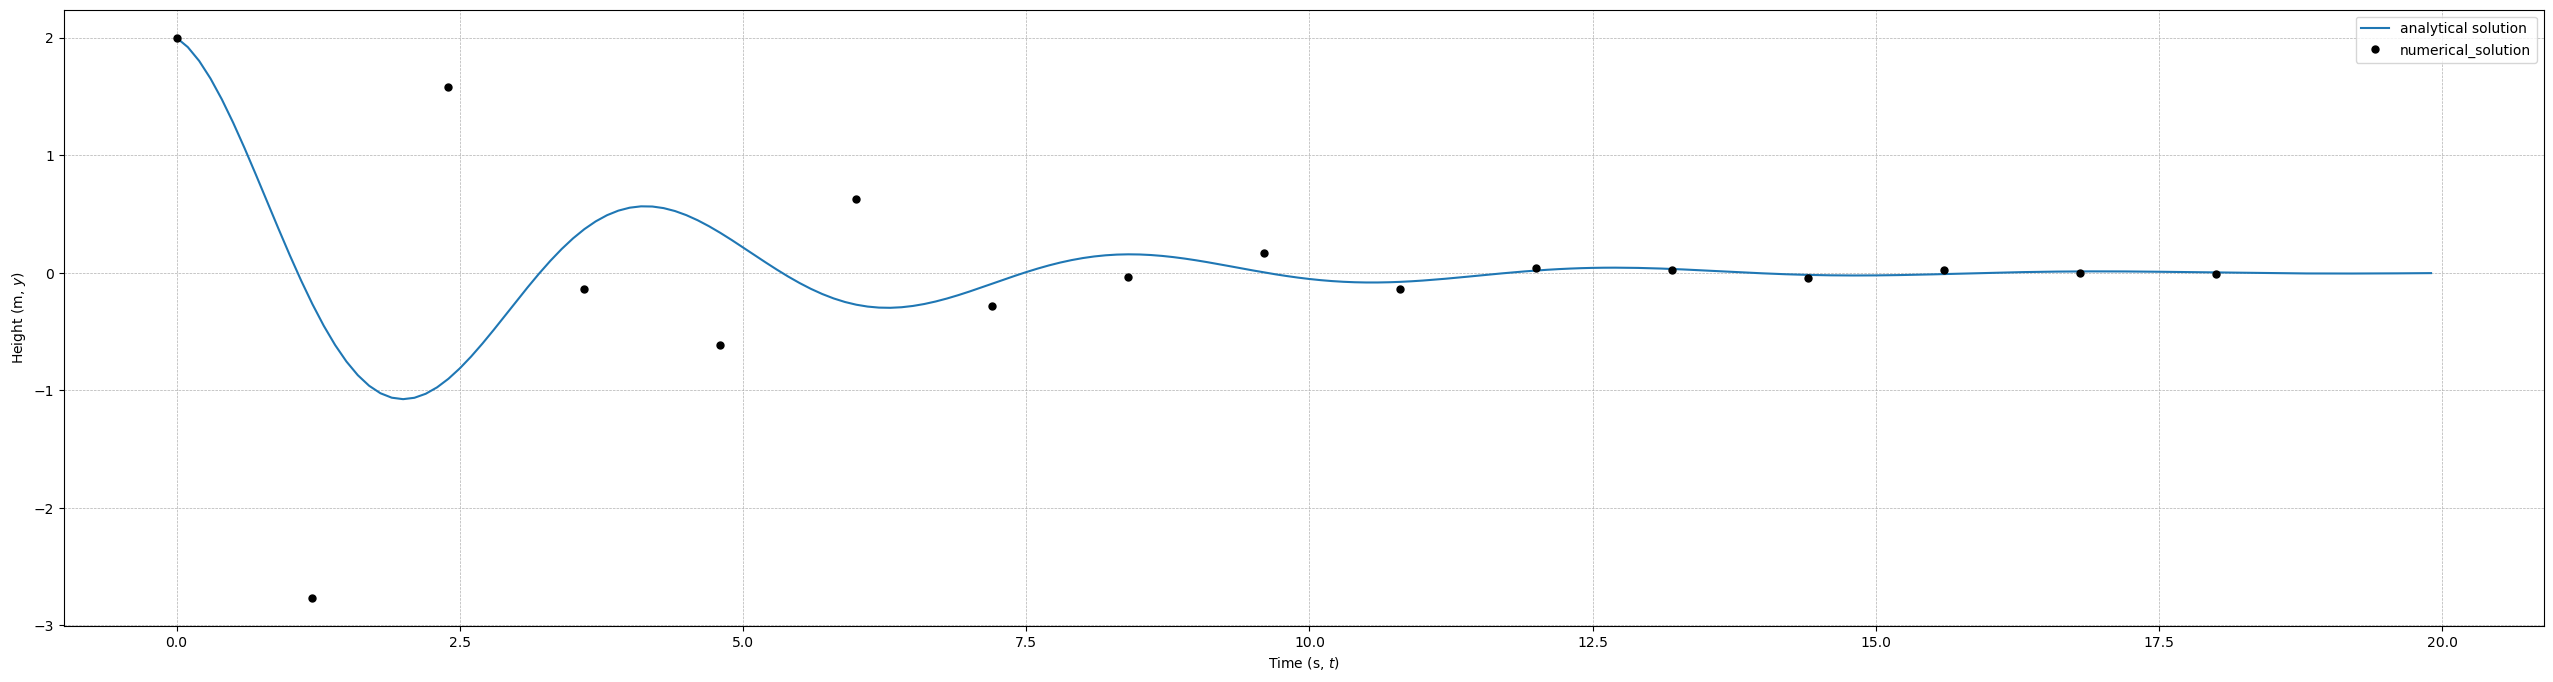

In [18]:
part07_stability_of_the_numerical_solution(1.2)

#### $\Delta t$ at 1.3

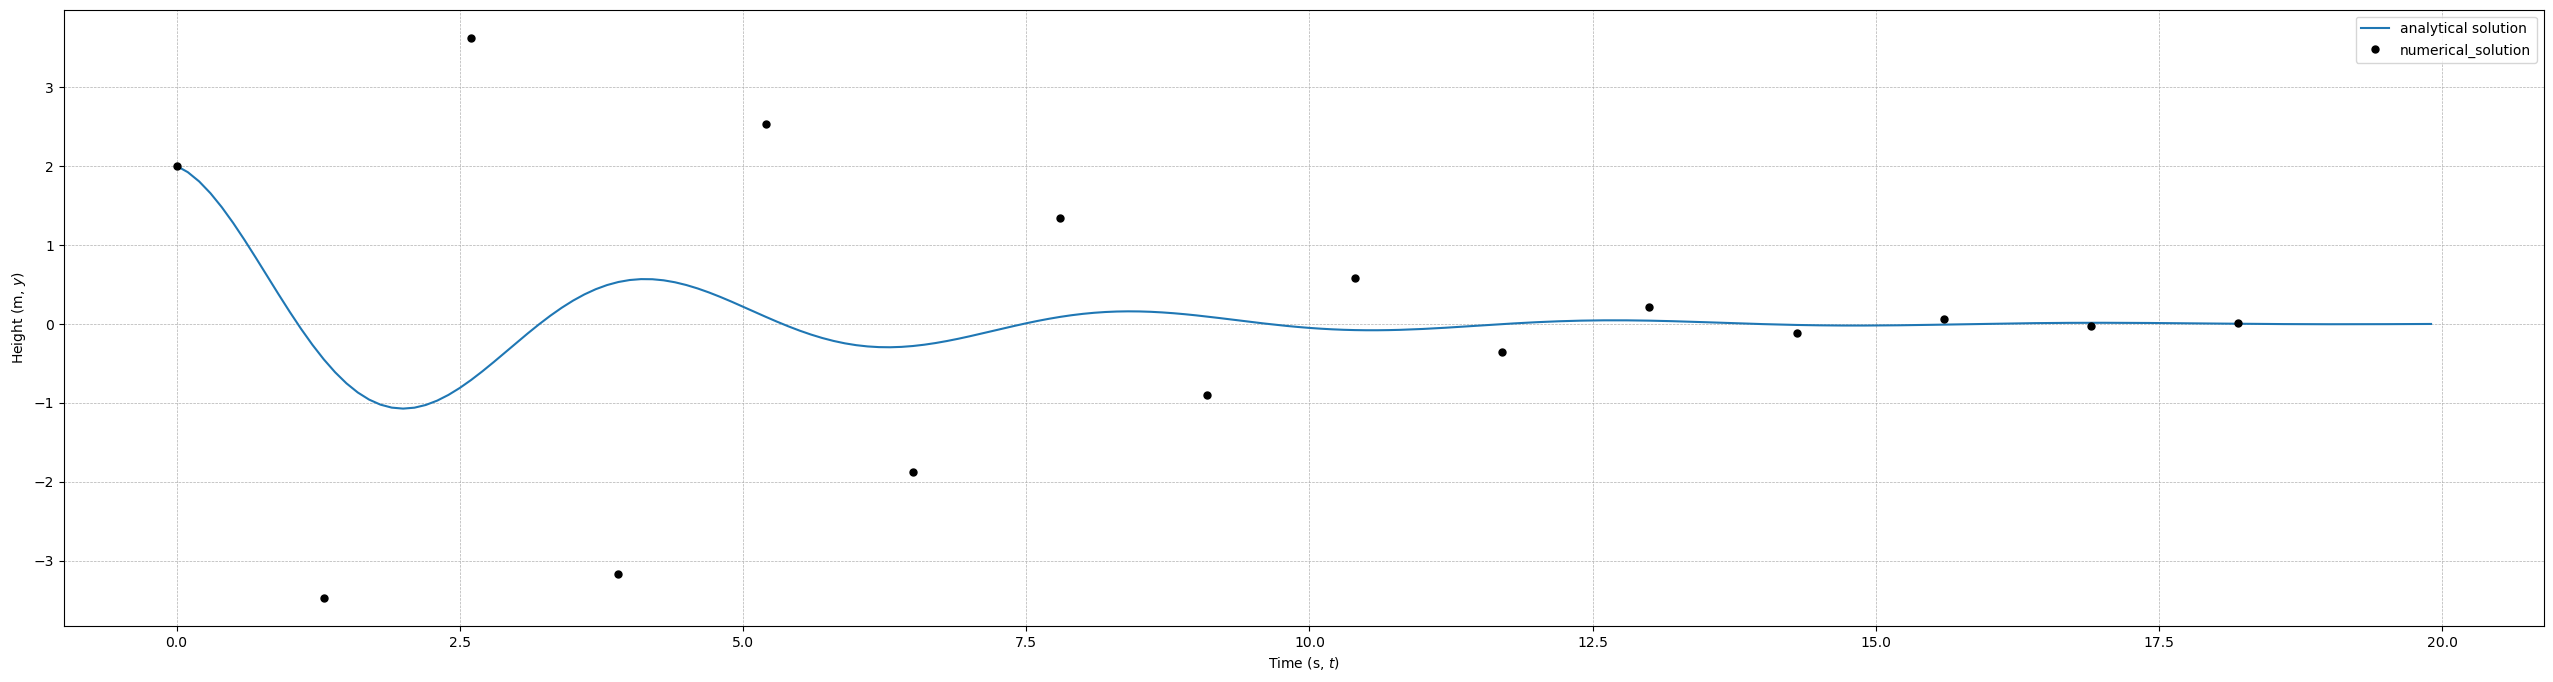

In [19]:
part07_stability_of_the_numerical_solution(1.3)

#### $\Delta t$ at 1.4

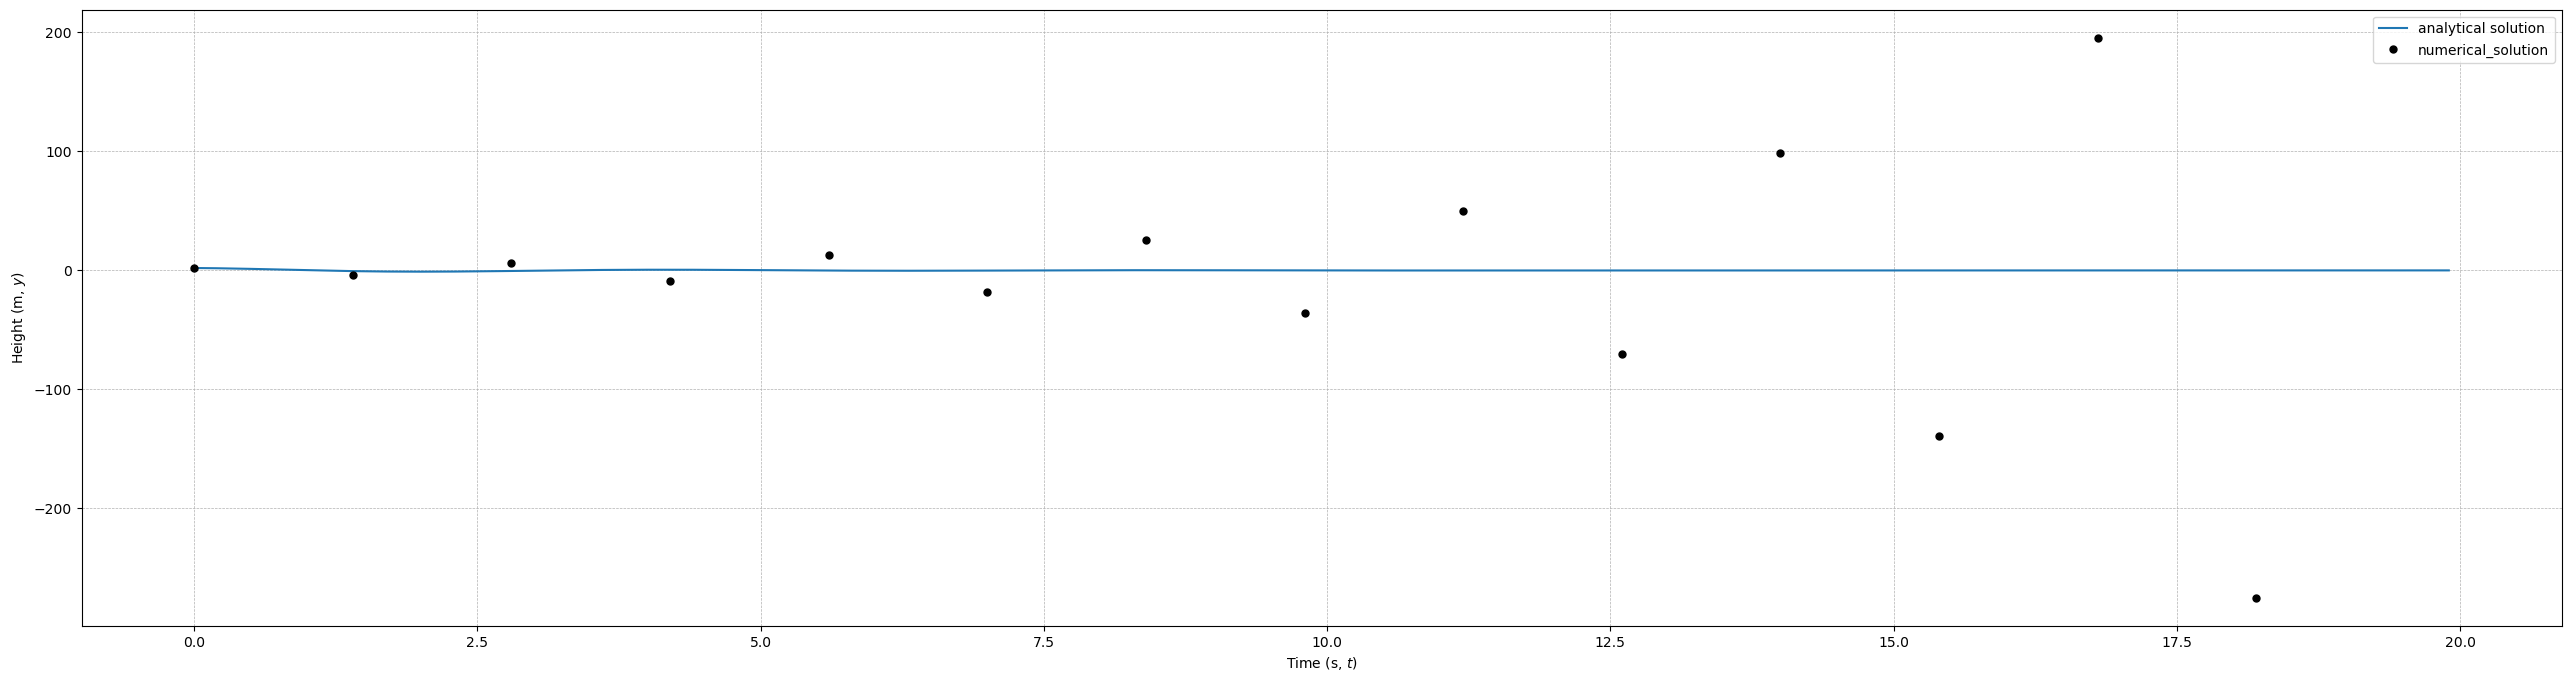

In [20]:
part07_stability_of_the_numerical_solution(1.4)

The range of $\Delta t$ values that stay in the same range of the analytical range is values less than or equal to $0.6$.

The range of $\Delta t$ values that "blow up" is greater than $0.6$.

Since the first term in the numerator, $\left[ 2 - \frac{k (\Delta t)^2}{m} \right] x(t)$, has a higher order $\Delta t$ at a certain value it will grow exponentially faster, causing the "blow-up" of the markers.